# Proyek Akhir : Menyelesaikan Permasalahan Jaya Jaya Institute

*   Nama : Vania Rachmawati Dewi
*   Email : vaniardewi@gmail.com
*   Id Dicoding : vaniard

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

### Menyiapkan data yang akan digunakan

In [2]:
df_students = pd.read_csv("data.csv", delimiter=';')

In [3]:
df_students.head()

Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0            1                     37   
3                         122.0            1                     38   
4                         100.0            1                     37   

   Fathers_qualification  ...  Curricular_units_2nd_sem_credited  \
0                     12  ...                                  0   
1                      3  ...                                  0   
2                     37  ...                                  0   
3                     37  ...                                  0   
4                     38  ...                                  0   

   Curricular_units_2nd_sem_enrolled  Curricular_units_2nd_sem_evaluations  \
0                                  0                                     0   
1                                  6                                     6   
2                                  6                                     0   
3                                  6                                    10   
4                                  6                                     6   

   Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
0                                  0                        0.000000   
1                                  6                       13.666667   
2                                  0                        0.000000   
3                                  5                       12.400000   
4                                  6                       13.000000   

   Curricular_units_2nd_sem_without_evaluations  Unemployment_rate  \
0                                             0               10.8   
1                                             0               13.9   
2                                             0               10.8   
3                                             0                9.4   
4                                             0               13.9   

   Inflation_rate   GDP    Status  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

## Data Understanding

**Informasi Dataset**

In [4]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Informasi dataset menampilkan kolom-kolom yang bertipe integerm float, object(string) atau lainnya. Hal ini dilakukan untuk langkah pembersihan dan pemrosesan data selanjutnya.

In [5]:
df_students.shape

(4424, 37)

Dataset berjumlah 4.424 kolom dan 37 baris.

**Mengecek Missing Value**

In [6]:
print("\nJumlah Data Yang Hilang : ")
df_students.isnull().sum()


Jumlah Data Yang Hilang : 


Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0
International                                   0
Curricular_units_1st_sem_credited               0
Curricular_units_1st_sem_enrolled               0
Curricular_units_1st_sem_evaluations            0
Curricular_units_1st_sem_approved               0
Curricular_units_1st_sem_grade                  0
Curricular_units_1st_sem_without_evaluations    0
Curricular_units_2nd_sem_credited               0
Curricular_units_2nd_sem_enrolled               0
Curricular_units_2nd_sem_evaluations            0
Curricular_units_2nd_sem_approved               0
Curricular_units_2nd_sem_grade                  0
Curricular_units_2nd_sem_without_evaluations    0
Unemployment_rate                               0
Inflation_rate                                  0
GDP                                             0
Status                                          0
dtype: int64

Tidak terdapat missing value pada dataset tersebut.

**Mengecek Data Duplikat**

In [7]:
print("\nJumlah Data Duplikat :")
df_students.duplicated().sum()


Jumlah Data Duplikat :


np.int64(0)

Tidak terdapat data duplikat pada dataset tersebut.

## Data Preparation / Processing

In [8]:
marital_status_mapping = {
    1: 'single', 2: 'married', 3: 'widower', 4: 'divorced', 5: 'facto union', 6: 'legally separated'
}

application_mode_mapping = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2 (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}

course_mapping = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

daytime_evening_mapping = {
    1: 'daytime', 0: 'evening'
}

previous_qualification_mapping = {
    1: 'Secondary education',
    2: 'Higher education - bachelor\'s degree',
    3: 'Higher education - degree',
    4: 'Higher education - master\'s',
    5: 'Higher education - doctorate',
    6: 'Frequency of higher education',
    9: '12th year of schooling - not completed',
    10: '11th year of schooling - not completed',
    12: 'Other - 11th year of schooling',
    14: '10th year of schooling',
    15: '10th year of schooling - not completed',
    19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
    38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    42: 'Professional higher technical course',
    43: 'Higher education - master (2nd cycle)'
}

nationality_mapping = {
    1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian', 13: 'Dutch', 14: 'English',
    17: 'Lithuanian', 21: 'Angolan', 22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican',
    26: 'Santomean', 32: 'Turkish', 41: 'Brazilian', 62: 'Romanian', 100: 'Moldova (Republic of)',
    101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban', 109: 'Colombian'
}

qualification_mapping = {
    1: 'Secondary Education - 12th Year of Schooling or Eq.',
    2: 'Higher Education - Bachelor\'s Degree',
    3: 'Higher Education - Degree',
    4: 'Higher Education - Master\'s',
    5: 'Higher Education - Doctorate',
    6: 'Frequency of Higher Education',
    9: '12th Year of Schooling - Not Completed',
    10: '11th Year of Schooling - Not Completed',
    11: '7th Year (Old)',
    12: 'Other - 11th Year of Schooling',
    14: '10th Year of Schooling',
    18: 'General commerce course',
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
    22: 'Technical-professional course',
    26: '7th year of schooling',
    27: '2nd cycle of the general high school course',
    29: '9th Year of Schooling - Not Completed',
    30: '8th year of schooling',
    34: 'Unknown',
    35: 'Can\'t read or write',
    36: 'Can read without having a 4th year of schooling',
    37: 'Basic education 1st cycle (4th/5th year) or equiv.',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    41: 'Specialized higher studies course',
    42: 'Professional higher technical course',
    43: 'Higher Education - Master (2nd cycle)',
    44: 'Higher Education - Doctorate (3rd cycle)'
}

occupation_mapping = {
    0: 'Student',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security and Safety Workers and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
    7: 'Skilled Workers in Industry, Construction and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: 'blank',
    122: 'Health professionals',
    123: 'teachers',
    125: 'Specialists in information and communication technologies (ICT)',
    131: 'Intermediate level science and engineering technicians and professions',
    132: 'Technicians and professionals, of intermediate level of health',
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
    141: 'Office workers, secretaries in general and data processing operators',
    143: 'Data, accounting, statistical, financial services and registry-related operators',
    144: 'Other administrative support staff',
    151: 'Personal service workers',
    152: 'Sellers',
    153: 'Personal care workers and the like',
    171: 'Skilled construction workers and the like, except electricians',
    173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
    191: 'Cleaning workers',
    192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
    193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
    194: 'Meal preparation assistants'
}

displaced_mapping = {0: 'no', 1: 'yes'}

educational_special_needs = {0: 'no', 1: 'yes'}

debtor = {0: 'no', 1: 'yes'}

tuition_fees_up_to_date = {0: 'no', 1: 'yes'}

gender = {0: 'female', 1: 'male'}

scholarship_holder = {0: 'no', 1: 'yes'}

international = {0: 'no', 1: 'yes'}

df_students['Marital_status'] = df_students['Marital_status'].map(marital_status_mapping)
df_students['Application_mode'] = df_students['Application_mode'].map(application_mode_mapping)
df_students['Course'] = df_students['Course'].map(course_mapping)
df_students['Daytime_evening_attendance'] = df_students['Daytime_evening_attendance'].map(daytime_evening_mapping)
df_students['Previous_qualification'] = df_students['Previous_qualification'].map(previous_qualification_mapping)
df_students['Nacionality'] = df_students['Nacionality'].map(nationality_mapping)
df_students['Mothers_qualification'] = df_students['Mothers_qualification'].map(qualification_mapping)
df_students['Fathers_qualification'] = df_students['Fathers_qualification'].map(qualification_mapping)
df_students['Mothers_occupation'] = df_students['Mothers_occupation'].map(occupation_mapping)
df_students['Fathers_occupation'] = df_students['Fathers_occupation'].map(occupation_mapping)
df_students['Displaced'] = df_students['Displaced'].map(displaced_mapping)
df_students['Educational_special_needs'] = df_students['Educational_special_needs'].map(educational_special_needs)
df_students['Debtor'] = df_students['Debtor'].map(debtor)
df_students['Tuition_fees_up_to_date'] = df_students['Tuition_fees_up_to_date'].map(tuition_fees_up_to_date)
df_students['Gender'] = df_students['Gender'].map(gender)
df_students['Scholarship_holder'] = df_students['Scholarship_holder'].map(scholarship_holder)
df_students['International'] = df_students['International'].map(international)


In [9]:
df_students.head()

Marital_status                  Application_mode  Application_order  \
0         single    2nd phase - general contingent                  5   
1         single  International student (bachelor)                  1   
2         single    1st phase - general contingent                  5   
3         single    2nd phase - general contingent                  2   
4        married                 Over 23 years old                  1   

                                Course Daytime_evening_attendance  \
0      Animation and Multimedia Design                    daytime   
1                              Tourism                    daytime   
2                 Communication Design                    daytime   
3         Journalism and Communication                    daytime   
4  Social Service (evening attendance)                    evening   

  Previous_qualification  Previous_qualification_grade Nacionality  \
0    Secondary education                         122.0  Portuguese   
1    Secondary education                         160.0  Portuguese   
2    Secondary education                         122.0  Portuguese   
3    Secondary education                         122.0  Portuguese   
4    Secondary education                         100.0  Portuguese   

                               Mothers_qualification  \
0  Basic Education 3rd Cycle (9th/10th/11th Year)...   
1  Secondary Education - 12th Year of Schooling o...   
2  Basic education 1st cycle (4th/5th year) or eq...   
3  Basic Education 2nd Cycle (6th/7th/8th Year) o...   
4  Basic education 1st cycle (4th/5th year) or eq...   

                               Fathers_qualification  ...  \
0                     Other - 11th Year of Schooling  ...   
1                          Higher Education - Degree  ...   
2  Basic education 1st cycle (4th/5th year) or eq...  ...   
3  Basic education 1st cycle (4th/5th year) or eq...  ...   
4  Basic Education 2nd Cycle (6th/7th/8th Year) o...  ...   

  Curricular_units_2nd_sem_credited Curricular_units_2nd_sem_enrolled  \
0                                 0                                 0   
1                                 0                                 6   
2                                 0                                 6   
3                                 0                                 6   
4                                 0                                 6   

   Curricular_units_2nd_sem_evaluations Curricular_units_2nd_sem_approved  \
0                                     0                                 0   
1                                     6                                 6   
2                                     0                                 0   
3                                    10                                 5   
4                                     6                                 6   

  Curricular_units_2nd_sem_grade Curricular_units_2nd_sem_without_evaluations  \
0                       0.000000                                            0   
1                      13.666667                                            0   
2                       0.000000                                            0   
3                      12.400000                                            0   
4                      13.000000                                            0   

  Unemployment_rate Inflation_rate   GDP    Status  
0              10.8            1.4  1.74   Dropout  
1              13.9           -0.3  0.79  Graduate  
2              10.8            1.4  1.74   Dropout  
3               9.4           -0.8 -3.12  Graduate  
4              13.9           -0.3  0.79  Graduate  

[5 rows x 37 columns]

**Mengganti Tipe Data**

In [10]:
columns = ['Marital_status', 'Application_mode', 'Application_order', 'Course',
           'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade',
           'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation',
           'Fathers_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
           'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International', 'Status']

df_students[columns] = df_students[columns].astype('category')

In [11]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   category
 1   Application_mode                              4424 non-null   category
 2   Application_order                             4424 non-null   category
 3   Course                                        4424 non-null   category
 4   Daytime_evening_attendance                    4424 non-null   category
 5   Previous_qualification                        4424 non-null   category
 6   Previous_qualification_grade                  4424 non-null   category
 7   Nacionality                                   4424 non-null   category
 8   Mothers_qualification                         4424 non-null   category
 9   Fathers_qualification                         4419 n

**Statistik Deskriptif**

In [12]:
df_students.describe(exclude='category')

Admission_grade  Age_at_enrollment  Curricular_units_1st_sem_credited  \
count      4424.000000        4424.000000                        4424.000000   
mean        126.978119          23.265145                           0.709991   
std          14.482001           7.587816                           2.360507   
min          95.000000          17.000000                           0.000000   
25%         117.900000          19.000000                           0.000000   
50%         126.100000          20.000000                           0.000000   
75%         134.800000          25.000000                           0.000000   
max         190.000000          70.000000                          20.000000   

       Curricular_units_1st_sem_enrolled  \
count                        4424.000000   
mean                            6.270570   
std                             2.480178   
min                             0.000000   
25%                             5.000000   
50%                             6.000000   
75%                             7.000000   
max                            26.000000   

       Curricular_units_1st_sem_evaluations  \
count                           4424.000000   
mean                               8.299051   
std                                4.179106   
min                                0.000000   
25%                                6.000000   
50%                                8.000000   
75%                               10.000000   
max                               45.000000   

       Curricular_units_1st_sem_approved  Curricular_units_1st_sem_grade  \
count                        4424.000000                     4424.000000   
mean                            4.706600                       10.640822   
std                             3.094238                        4.843663   
min                             0.000000                        0.000000   
25%                             3.000000                       11.000000   
50%                             5.000000                       12.285714   
75%                             6.000000                       13.400000   
max                            26.000000                       18.875000   

       Curricular_units_1st_sem_without_evaluations  \
count                                   4424.000000   
mean                                       0.137658   
std                                        0.690880   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        0.000000   
max                                       12.000000   

       Curricular_units_2nd_sem_credited  Curricular_units_2nd_sem_enrolled  \
count                        4424.000000                        4424.000000   
mean                            0.541817                           6.232143   
std                             1.918546                           2.195951   
min                             0.000000                           0.000000   
25%                             0.000000                           5.000000   
50%                             0.000000                           6.000000   
75%                             0.000000                           7.000000   
max                            19.000000                          23.000000   

       Curricular_units_2nd_sem_evaluations  \
count                           4424.000000   
mean                               8.063291   
std                                3.947951   
min                                0.000000   
25%                                6.000000   
50%                                8.000000   
75%                               10.000000   
max                               33.000000   

       Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
count                        4424.000000                     4424.000000


*   Addmission_grade : Rentang nilai penerimaan (95.0 hingga 190.0) dan nilai rata-rata sekitar 127 menunjukkan variasi dalam standar penerimaan. Standar deviasi (14.48) menunjukkan sebaran nilai penerimaan.
*   Age_at_enrollment :  Usia mahasiswa saat mendaftar berkisar antara 17 hingga 70 tahun, dengan usia rata-rata sekitar 23 tahun.
*   Curricular_units_1st_sem_credited, Curricular_units_2nd_sem_credited : Rata-rata unit kurikuler yang dikreditkan pada semester pertama (0.71) dan kedua (0.54) sangat rendah, dengan nilai maksimum yang jauh lebih tinggi (20 dan 19). Ini menunjukkan bahwa sebagian besar mahasiswa tidak memiliki banyak unit yang dikreditkan dari pengalaman sebelumnya.
*   Curricular_units_1st_sem_enrolled, Curricular_units_2nd_sem_enrolled : Rata-rata unit kurikuler yang diambil pada semester pertama (6.27) dan kedua (6.23) cukup konsisten, dengan sebagian besar mahasiswa mengambil sekitar 5-7 unit.
*   Curricular_units_1st_sem_approved, Curricular_units_2nd_sem_approved : Rata-rata unit kurikuler yang berhasil diselesaikan pada semester pertama (4.71) lebih tinggi daripada semester kedua (4.44). Ini bisa mengindikasikan sedikit penurunan kinerja di semester kedua secara rata-rata.
*   Curricular_units_1st_sem_grade, Curricular_units_2nd_sem_grade : Rata-rata nilai unit kurikuler pada semester pertama (10.64) dan kedua (10.23) cukup mirip. Standar deviasi yang relatif tinggi (sekitar 4.8 dan 5.2) menunjukkan variasi yang signifikan dalam nilai mahasiswa.
*   Curricular_units_1st_sem_without_evaluations, Curricular_units_2nd_sem_without_evaluations : Rata-rata unit kurikuler tanpa evaluasi pada kedua semester sangat rendah (sekitar 0.14 dan 0.15), menunjukkan bahwa sebagian besar unit kurikuler memiliki evaluasi.
*   Unemployment_rate, Inflation_rate, GDP : Statistik deskriptif untuk variabel ekonomi ini menunjukkan rentang dan sebaran nilai selama periode waktu data dikumpulkan. Ini bisa menjadi faktor eksternal yang memengaruhi status mahasiswa.

In [13]:
df_students.describe(include='category')

Marital_status                Application_mode  Application_order  \
count            4424                            4424               4424   
unique              6                              18                  8   
top            single  1st phase - general contingent                  1   
freq             3919                            1708               3026   

         Course Daytime_evening_attendance Previous_qualification  \
count      4424                       4424                   4424   
unique       17                          2                     17   
top     Nursing                    daytime    Secondary education   
freq        766                       3941                   3717   

        Previous_qualification_grade Nacionality  \
count                         4424.0        4424   
unique                         101.0          21   
top                            133.1  Portuguese   
freq                           491.0        4314   

                                    Mothers_qualification  \
count                                                4424   
unique                                                 29   
top     Secondary Education - 12th Year of Schooling o...   
freq                                                 1069   

                                    Fathers_qualification Mothers_occupation  \
count                                                4419               4424   
unique                                                 29                 32   
top     Basic education 1st cycle (4th/5th year) or eq...  Unskilled Workers   
freq                                                 1209               1577   

       Fathers_occupation Displaced Educational_special_needs Debtor  \
count                4390      4424                      4424   4424   
unique                 29         2                         2      2   
top     Unskilled Workers       yes                        no     no   
freq                 1010      2426                      4373   3921   

       Tuition_fees_up_to_date  Gender Scholarship_holder International  \
count                     4424    4424               4424          4424   
unique                       2       2                  2             2   
top                        yes  female                 no            no   
freq                      3896    2868               3325          4314   

          Status  
count       4424  
unique         3  
top     Graduate  
freq        2209


*   Marital_status : Sebagian besar mahasiswa berstatus 'single' (3919 dari 4424). Ini menunjukkan bahwa populasi mahasiswa didominasi oleh individu yang belum menikah.
*   Application_mode: '1st phase - general contingent' adalah mode aplikasi yang paling umum (1708), diikuti oleh mode aplikasi lainnya. Ini memberikan gambaran tentang jalur masuk utama mahasiswa ke institusi.
*   Application_order : Order aplikasi '1' adalah yang paling sering muncul (3026), menunjukkan bahwa sebagian besar mahasiswa mendaftar pada kesempatan pertama.
*   Course : Jurusan 'Nursing' memiliki jumlah mahasiswa terbanyak (766), menunjukkan popularitas jurusan tersebut.
*   Daytime_evening_attendance : Sebagian besar mahasiswa mengambil kelas pada 'daytime' (3941), dengan jumlah yang lebih sedikit mengambil kelas 'evening'.
*   Previous_qualification : Kualifikasi sebelumnya yang paling umum adalah 'Secondary education' (3717). Ini konsisten dengan sebagian besar mahasiswa yang mendaftar setelah menyelesaikan pendidikan menengah.
*   Previous_qualification_grade : Nilai kualifikasi sebelumnya '133.1' adalah yang paling sering muncul (491 kali), namun perlu dicatat bahwa ada 101 nilai unik, menunjukkan variasi dalam nilai kualifikasi sebelumnya.
*   Nacionality : Mayoritas mahasiswa berkebangsaan 'Portuguese' (4314), yang wajar mengingat konteks dataset kemungkinan berasal dari Portugal.
*   Mothers_qualification dan Fathers_qualification : Kualifikasi ibu yang paling umum adalah 'Secondary Education - 12th Year of Schooling or Eq.' (1069), sedangkan kualifikasi ayah yang paling umum adalah 'Basic education 1st cycle (4th/5th year) or eq...' (1209).
*   Displaced : Lebih banyak mahasiswa yang 'displaced' (2426) dibandingkan yang 'no' (2000). Ini mungkin merujuk pada mahasiswa yang pindah tempat tinggal untuk kuliah.
*   Educational_special_needs : Mayoritas mahasiswa tidak memiliki kebutuhan pendidikan khusus ('no' 4373).
*   Debtor : Sebagian besar mahasiswa bukanlah 'debtor' (3921).
*   Tuition_fees_up_to_date : Mayoritas mahasiswa telah membayar biaya kuliah tepat waktu ('yes' 3896).
*   Gender : Ada lebih banyak mahasiswa 'female' (2868) dibandingkan 'male' (1556).
*   Scholarship_holder : Mayoritas mahasiswa bukanlah penerima beasiswa ('no' 3325).
*   International : Sebagian besar mahasiswa bukanlah mahasiswa internasional ('no' 4314).
*   Status : Terdapat tiga status mahasiswa: 'Graduate', 'Dropout', dan 'Enrolled'. Status yang paling sering muncul adalah 'Graduate' (2209), diikuti oleh 'Dropout' (1421) dan 'Enrolled' (794). Ini menunjukkan adanya masalah dropout yang signifikan yang perlu diatasi.

In [14]:
df_students.to_csv('student.csv', index=False)

**Menghitung Jumlah Kolom**

In [15]:
nums_columns = df_students.shape[1]
print(f"Jumlah Kolom: {nums_columns}")

Jumlah Kolom: 37


**Correlation Metrix**

In [16]:
numerical_cols = df_students.select_dtypes(include=['float64', 'int64']).columns

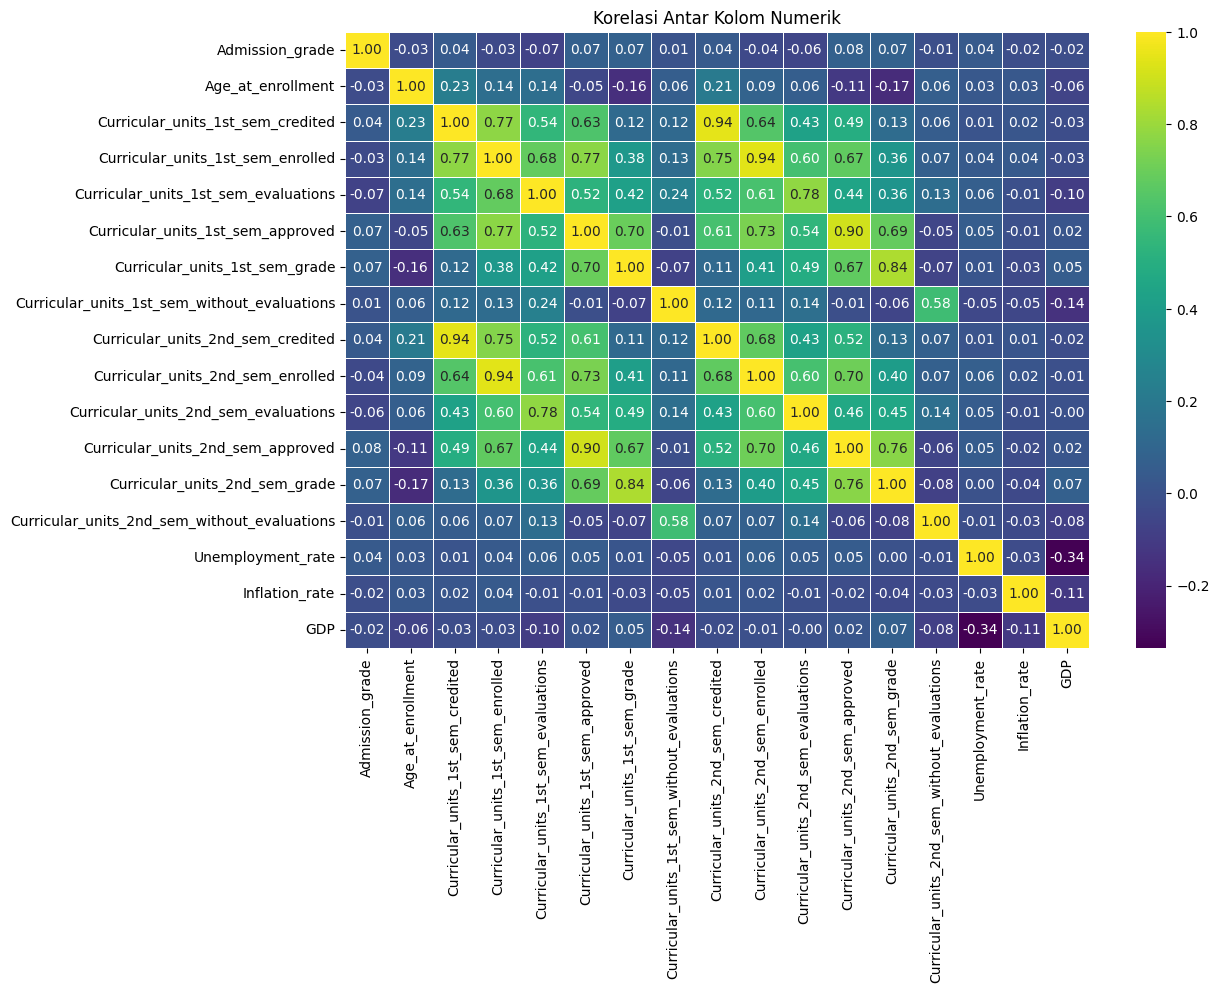

In [17]:
cm = df_students[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Kolom Numerik')
plt.show()

**Daftar Kolom Numerik**

In [18]:
numerical_cols

Index(['Admission_grade', 'Age_at_enrollment',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
       'Inflation_rate', 'GDP'],
      dtype='object')

**Mengecek Outlier**

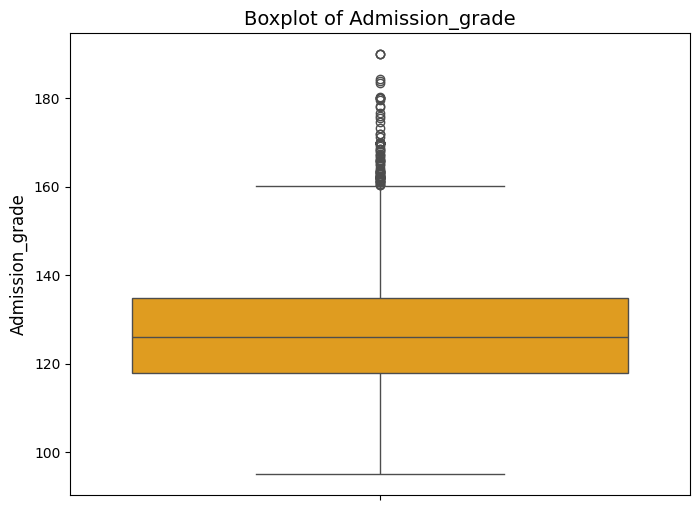

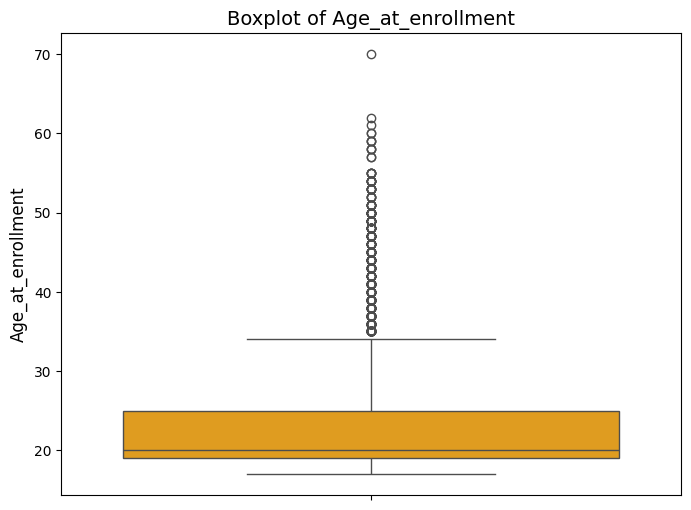

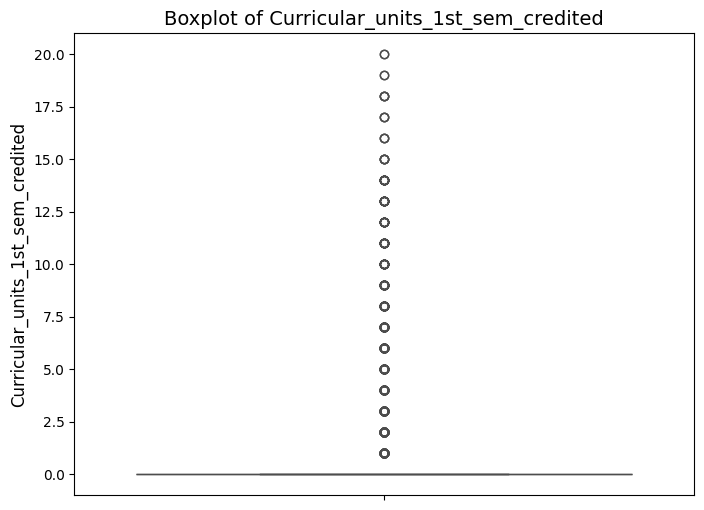

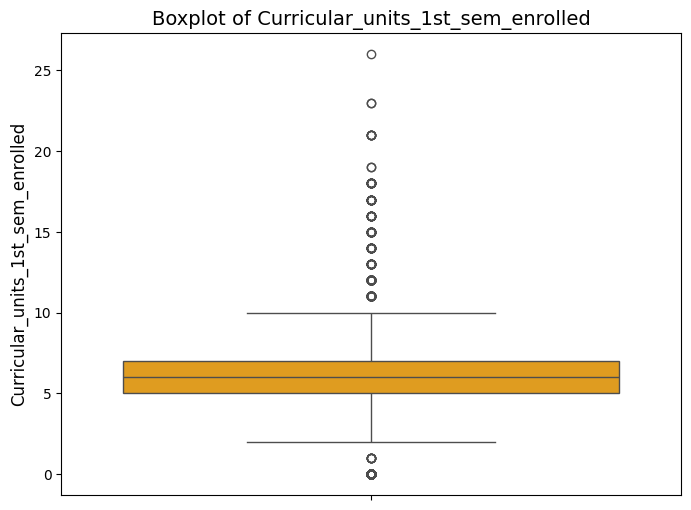

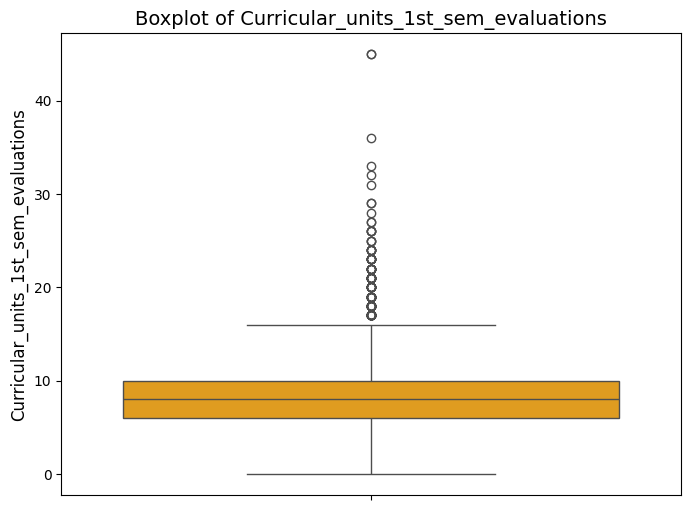

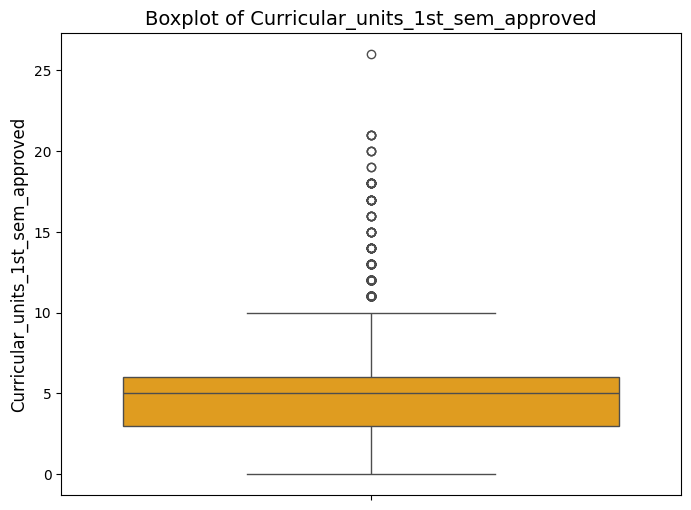

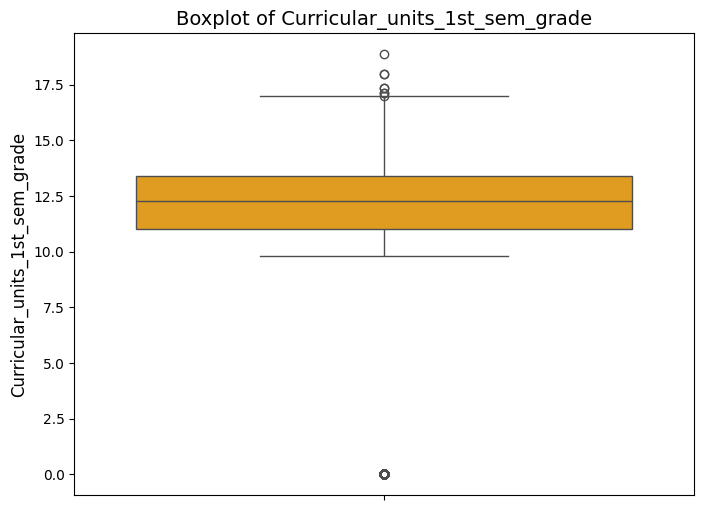

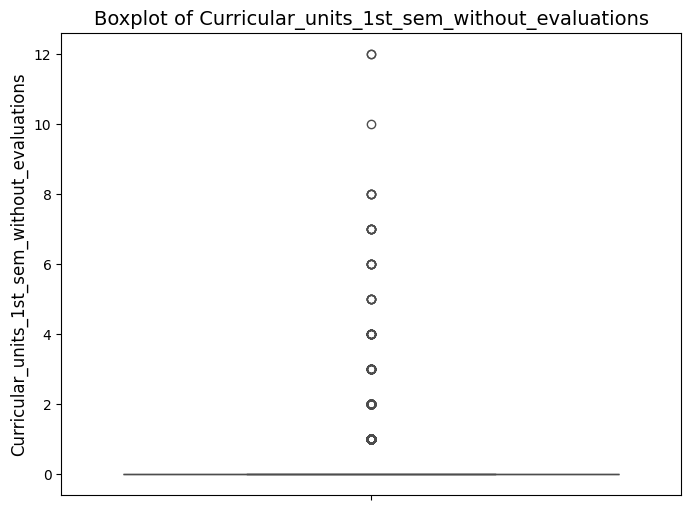

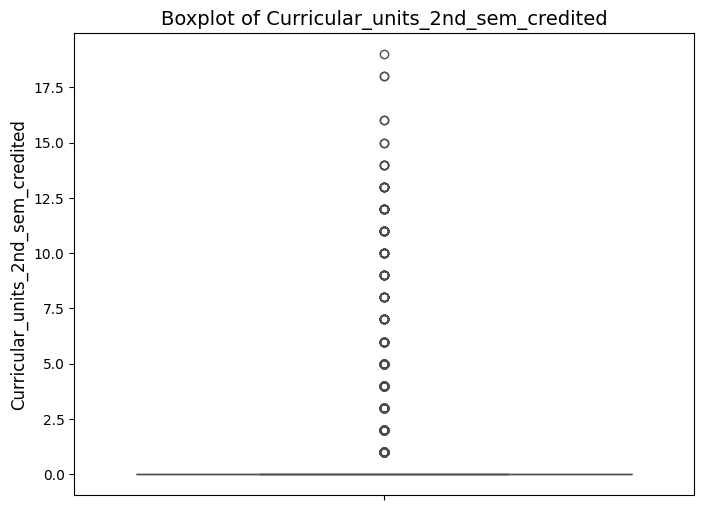

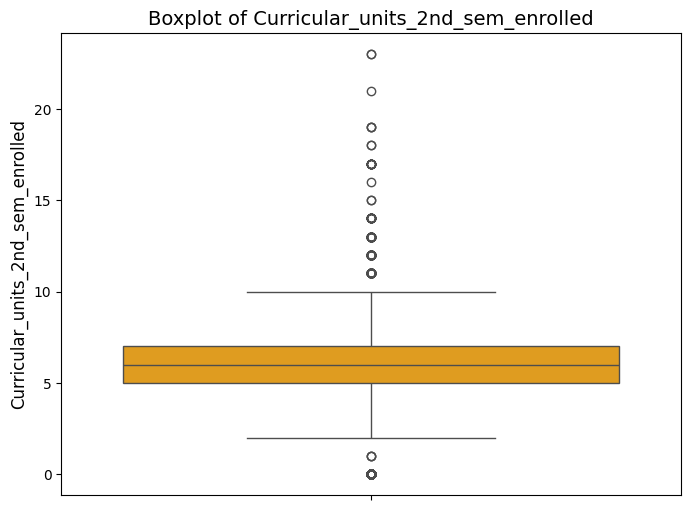

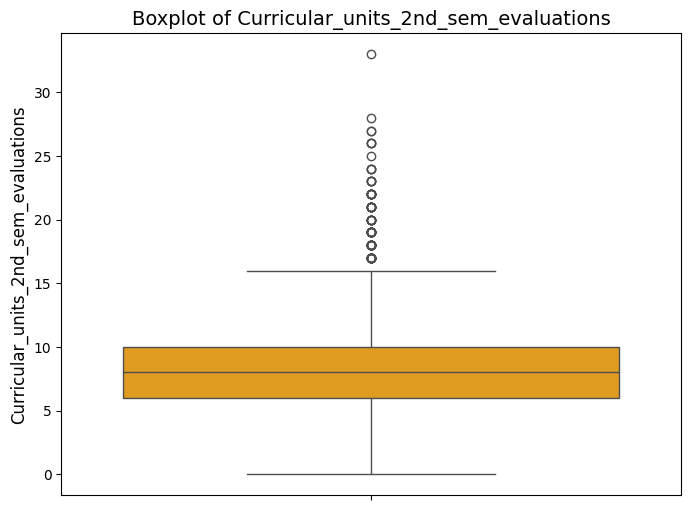

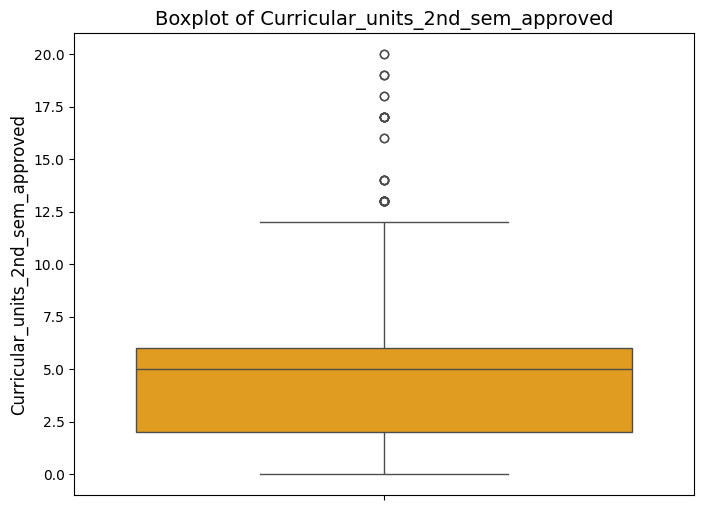

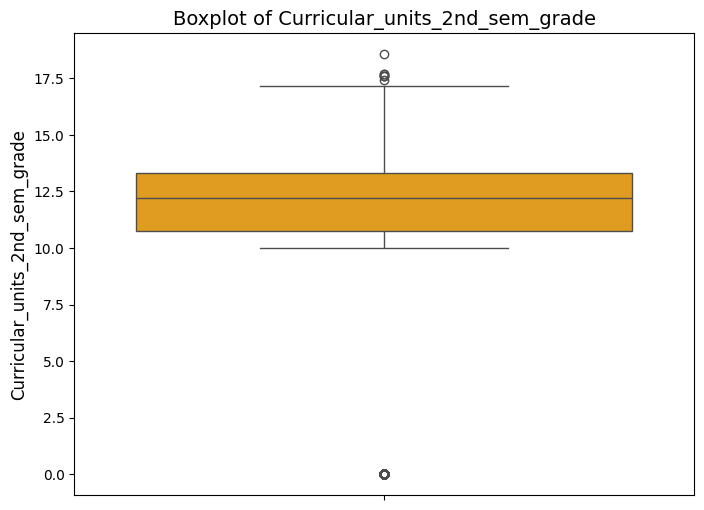

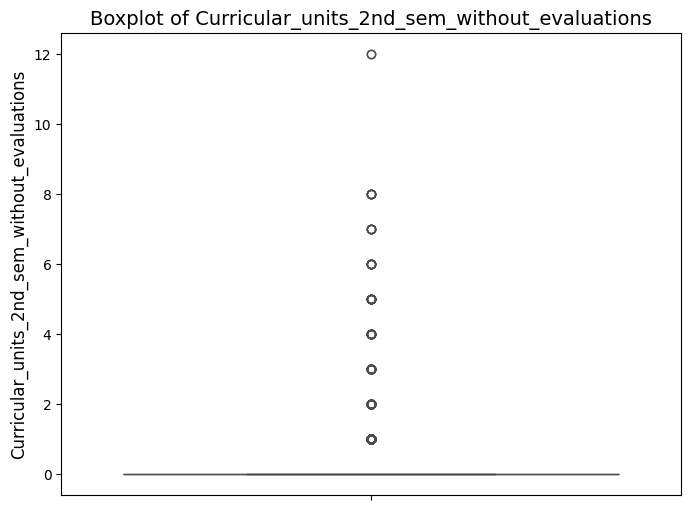

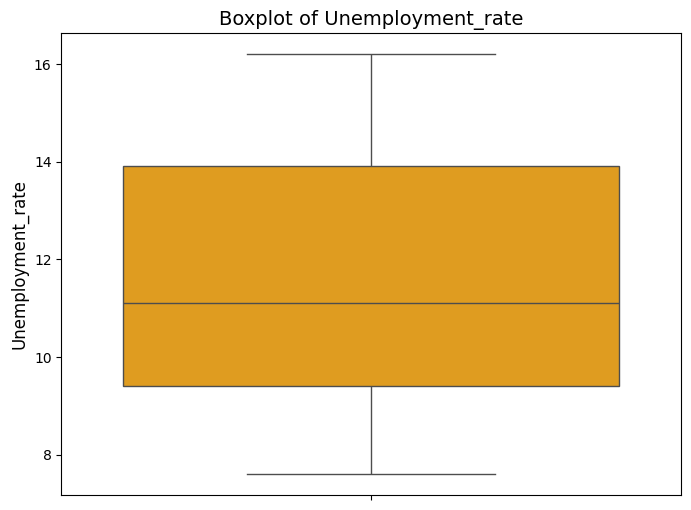

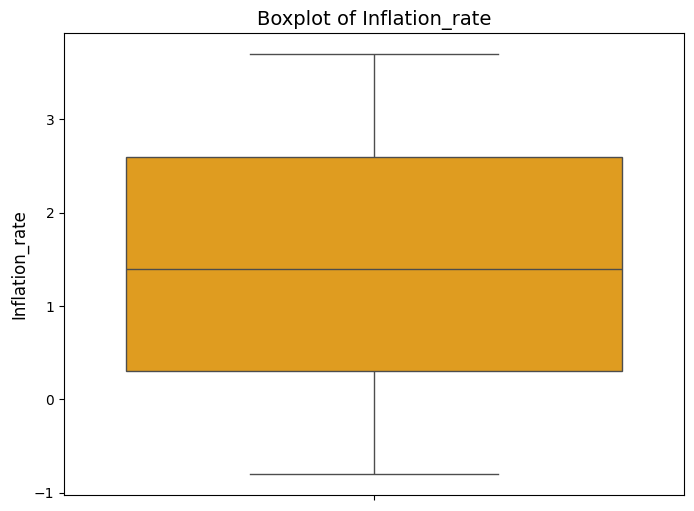

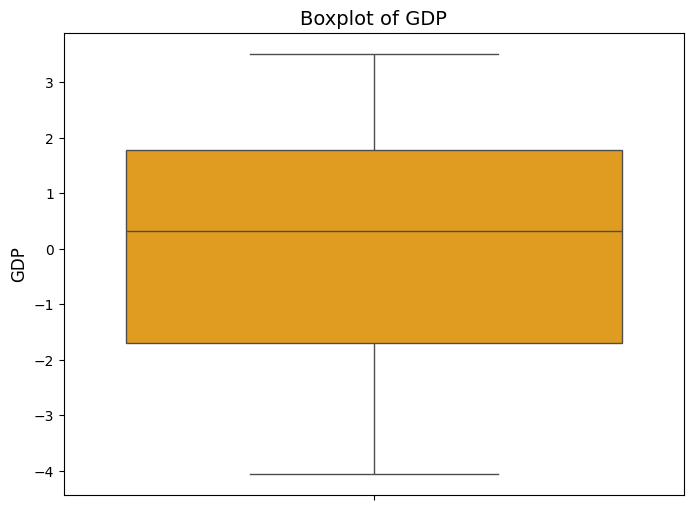

In [19]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_students, y=col, color='orange')
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.ylabel(col, fontsize=12)
    plt.xlabel('')
    plt.show()


*   Admission_grade : Boxplot menunjukkan sebaran nilai penerimaan. Garis tengah (median) berada di sekitar 126. Terdapat beberapa titik data di atas dan di bawah batas boxplot yang menunjukkan adanya outlier, yaitu nilai penerimaan yang jauh lebih tinggi atau lebih rendah dari mayoritas data.
*   Age_at_enrollment : Boxplot ini menunjukkan distribusi usia saat pendaftaran. Median usia terlihat di sekitar 20 tahunan. Ada cukup banyak outlier pada usia yang lebih tua, menunjukkan bahwa ada sejumlah mahasiswa yang mendaftar di usia yang jauh lebih matang.
*   Curricular_units_1st_sem_credited dan Curricular_units_2nd_sem_credited : Kedua boxplot ini menunjukkan bahwa sebagian besar mahasiswa tidak memiliki unit kurikuler yang dikreditkan (nilai median berada di 0). Terdapat banyak outlier pada nilai yang lebih tinggi, menandakan ada beberapa mahasiswa yang berhasil mengkreditkan sejumlah besar unit dari pengalaman sebelumnya.
*   Curricular_units_1st_sem_enrolled dan Curricular_units_2nd_sem_enrolled : Boxplot untuk unit yang diambil pada semester pertama dan kedua menunjukkan distribusi yang relatif terkonsentrasi di sekitar median (sekitar 6 unit). Ada outlier pada jumlah unit yang sangat tinggi, yang mungkin merupakan kasus khusus atau kesalahan data.
*   Curricular_units_1st_sem_evaluations dan Curricular_units_2nd_sem_evaluations : Distribusi jumlah evaluasi menunjukkan bahwa sebagian besar unit memiliki beberapa evaluasi. Terdapat outlier pada jumlah evaluasi yang sangat tinggi.
*   Curricular_units_1st_sem_approved dan Curricular_units_2nd_sem_approved : Boxplot ini penting untuk melihat kinerja akademik. Median unit yang disetujui pada semester pertama dan kedua menunjukkan jumlah unit yang berhasil diselesaikan. Outlier pada nilai yang lebih tinggi menunjukkan mahasiswa dengan kinerja yang sangat baik.
*   Curricular_units_1st_sem_grade dan Curricular_units_2nd_sem_grade : Boxplot nilai rata-rata per unit menunjukkan sebaran nilai mahasiswa. Median nilai berada di sekitar 12-13. Terdapat outlier pada nilai yang sangat rendah (mendekati 0) yang mungkin mengindikasikan mahasiswa yang tidak menyelesaikan unit atau mendapatkan nilai yang sangat buruk.
*   Curricular_units_1st_sem_without_evaluations dan Curricular_units_2nd_sem_without_evaluations : Kedua boxplot ini menunjukkan bahwa sebagian besar mahasiswa memiliki sangat sedikit atau tidak ada unit tanpa evaluasi. Terdapat outlier pada nilai yang lebih tinggi.
*   Unemployment_rate, Inflation_rate, dan GDP : Boxplot untuk variabel ekonomi ini menunjukkan sebaran nilai-nilai tersebut selama periode data dikumpulkan. Mereka terlihat memiliki distribusi yang relatif normal dengan beberapa potensi outlier.

**Menghapus Kolom**

In [20]:
columns_to_drop = ['Curricular_units_1st_sem_credited',
                   'Curricular_units_1st_sem_without_evaluations',
                   'Curricular_units_2nd_sem_credited',
                   'Curricular_units_2nd_sem_without_evaluations']

df_students = df_students.drop(columns=columns_to_drop)

**Menangani Outlier**

In [21]:
columns_process = [
    'Admission_grade', 'Age_at_enrollment',
    'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade'
]

class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols
        self.lower_bounds = {}
        self.upper_bounds = {}

    def fit(self, X, y=None):
        for col in self.cols:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            self.lower_bounds[col] = Q1 - 1.5 * IQR
            self.upper_bounds[col] = Q3 + 1.5 * IQR
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.cols:
            lower = self.lower_bounds[col]
            upper = self.upper_bounds[col]
            X[col] = np.clip(X[col], lower, upper)
        return X

**Membuat Pipeline**

In [22]:
pipeline = Pipeline(steps=[
    ('penanganan_outlier', OutlierHandler(cols=columns_process))
])

df_students = pipeline.fit_transform(df_students)

In [23]:
joblib.dump(pipeline, 'outlier_pipeline.joblib')

['outlier_pipeline.joblib']

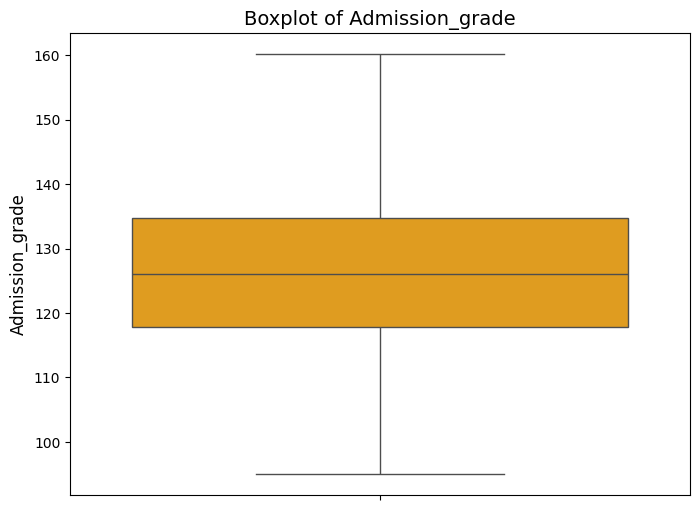

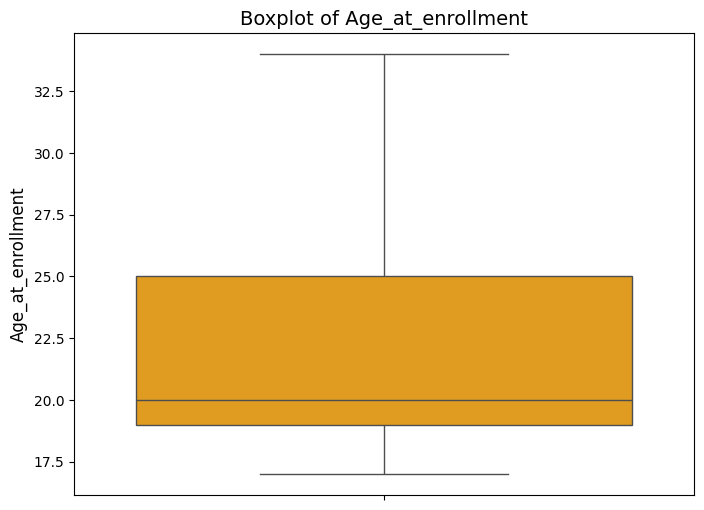

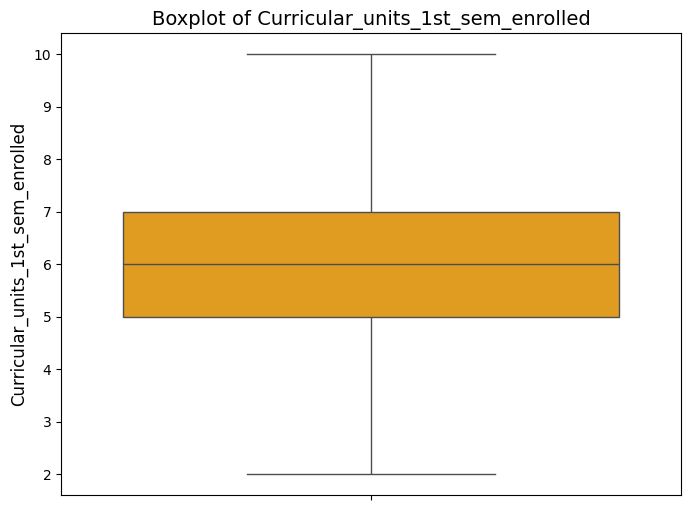

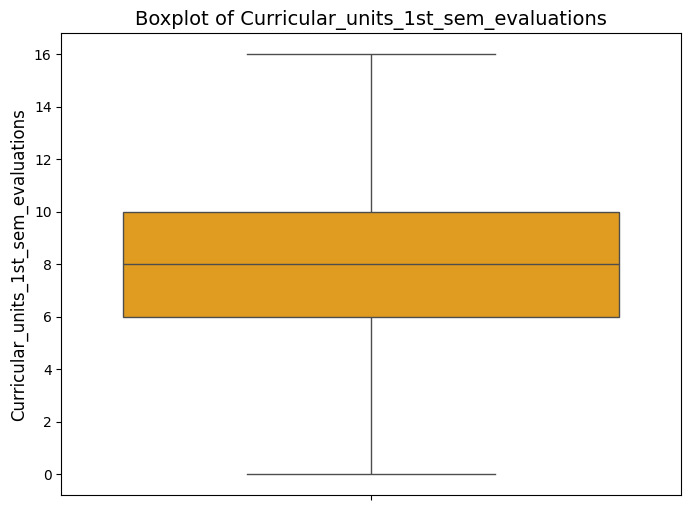

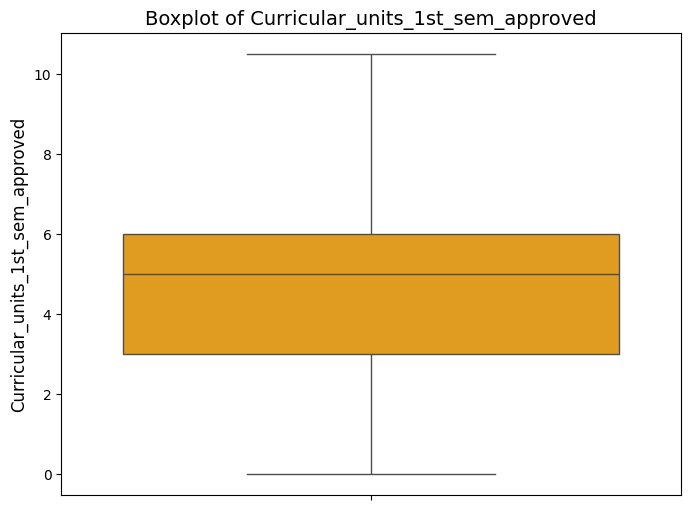

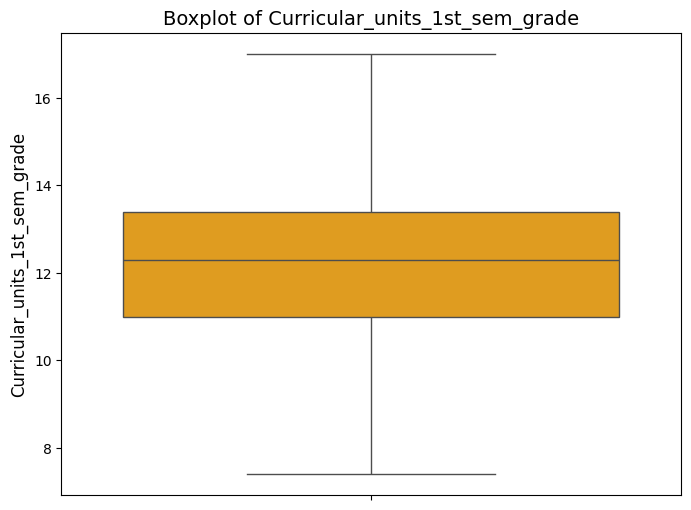

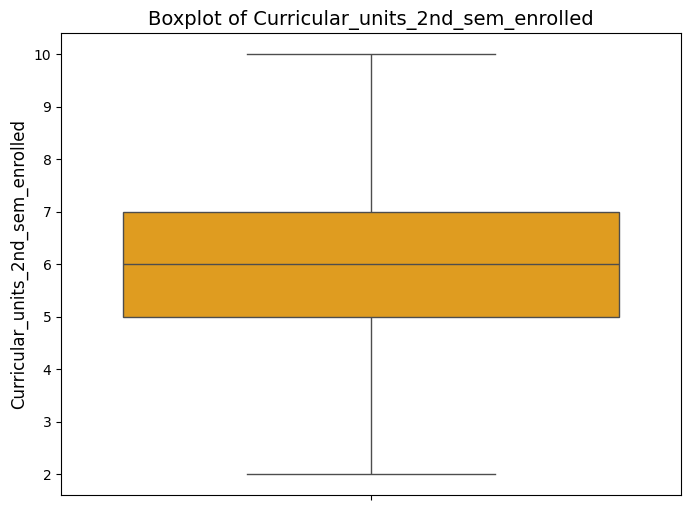

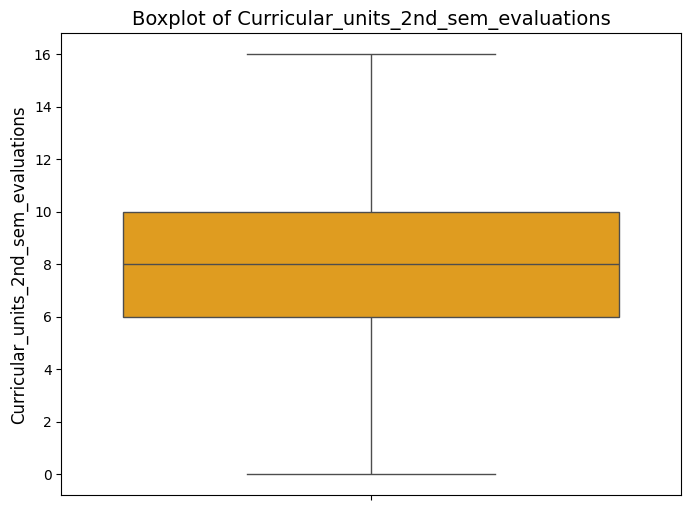

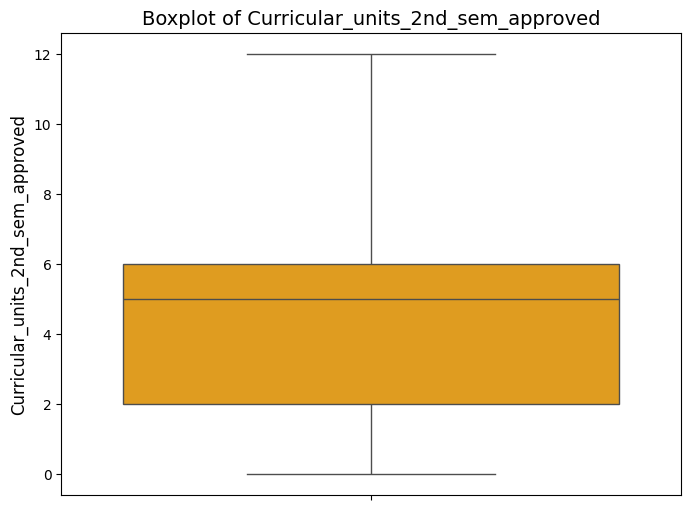

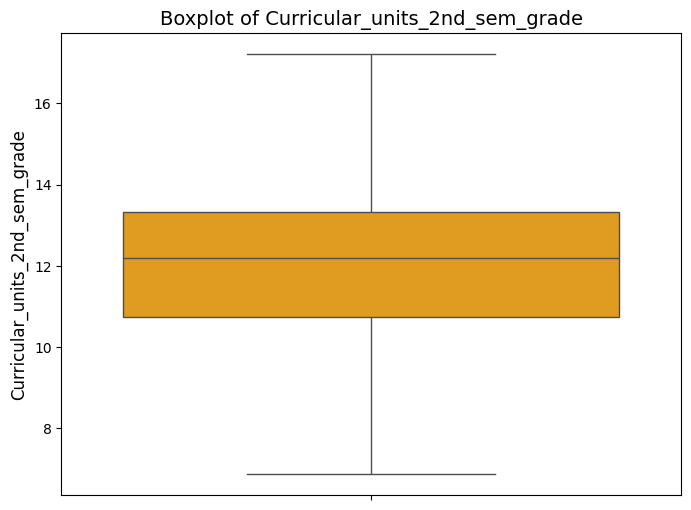

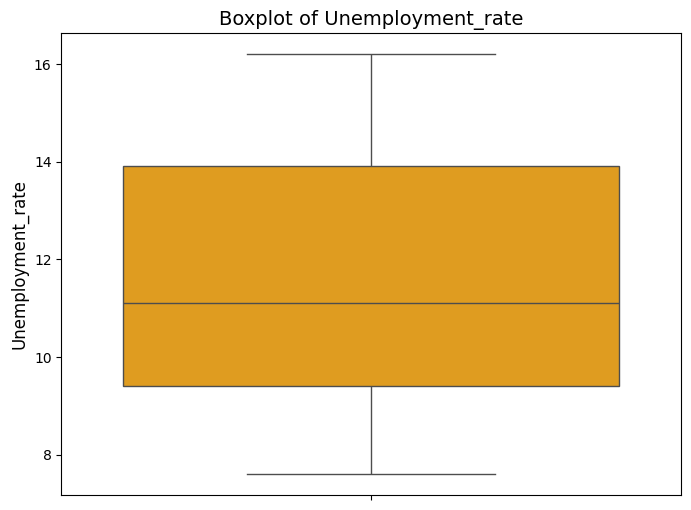

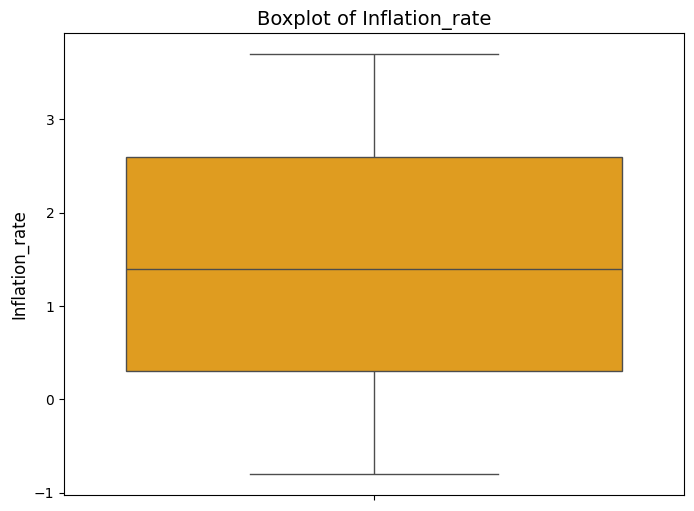

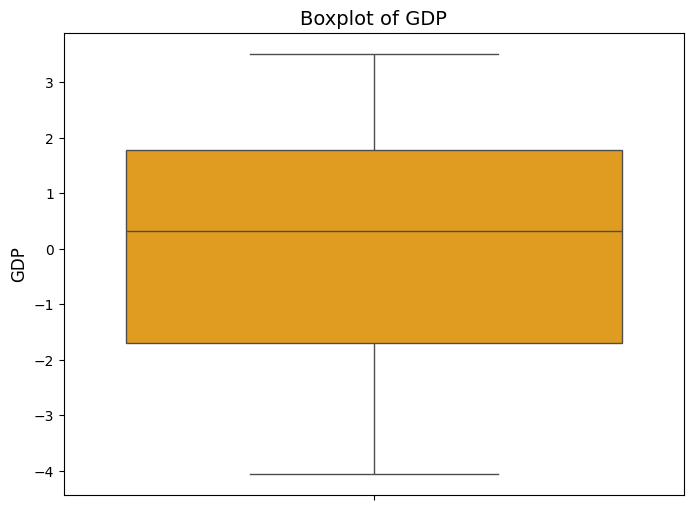

In [24]:
numerical_cols = ['Admission_grade', 'Age_at_enrollment',
                  'Curricular_units_1st_sem_enrolled',
                  'Curricular_units_1st_sem_evaluations',
                  'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
                  'Curricular_units_2nd_sem_enrolled',
                  'Curricular_units_2nd_sem_evaluations',
                  'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
                  'Unemployment_rate', 'Inflation_rate', 'GDP']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_students, y=col, color='orange')
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.ylabel(col, fontsize=12)
    plt.xlabel('')
    plt.show()

**Daftar Kolom Kategori**

In [25]:
category_cols = [
    'Marital_status', 'Application_mode', 'Application_order', 'Course',
    'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality', 'Mothers_qualification',
    'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
    'Displaced', 'Educational_special_needs', 'Debtor',
    'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International'
]

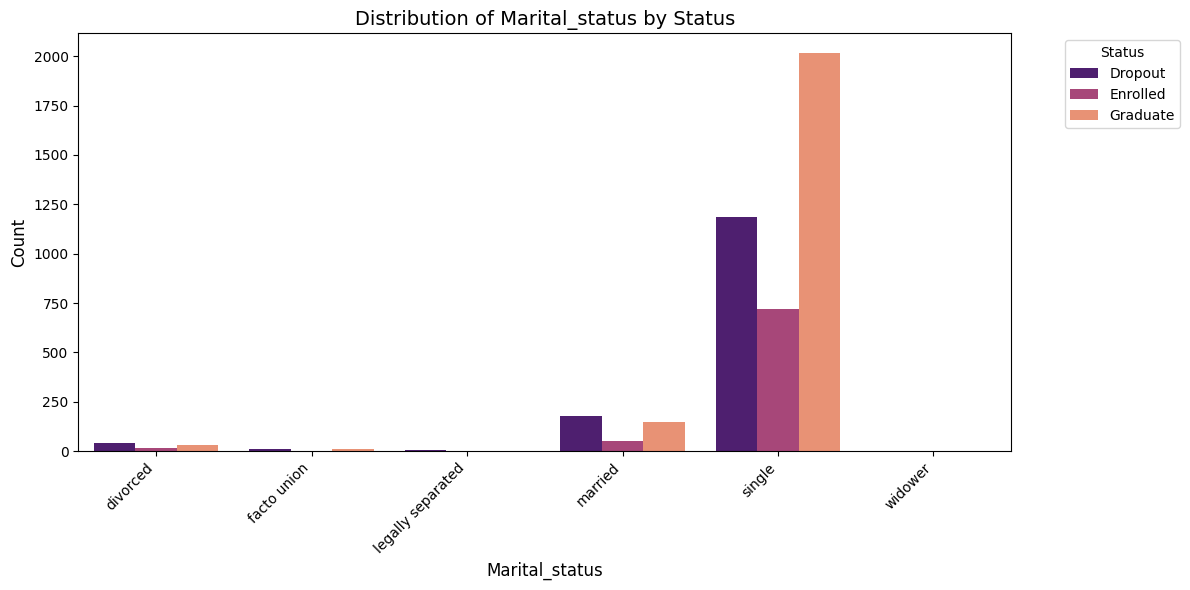

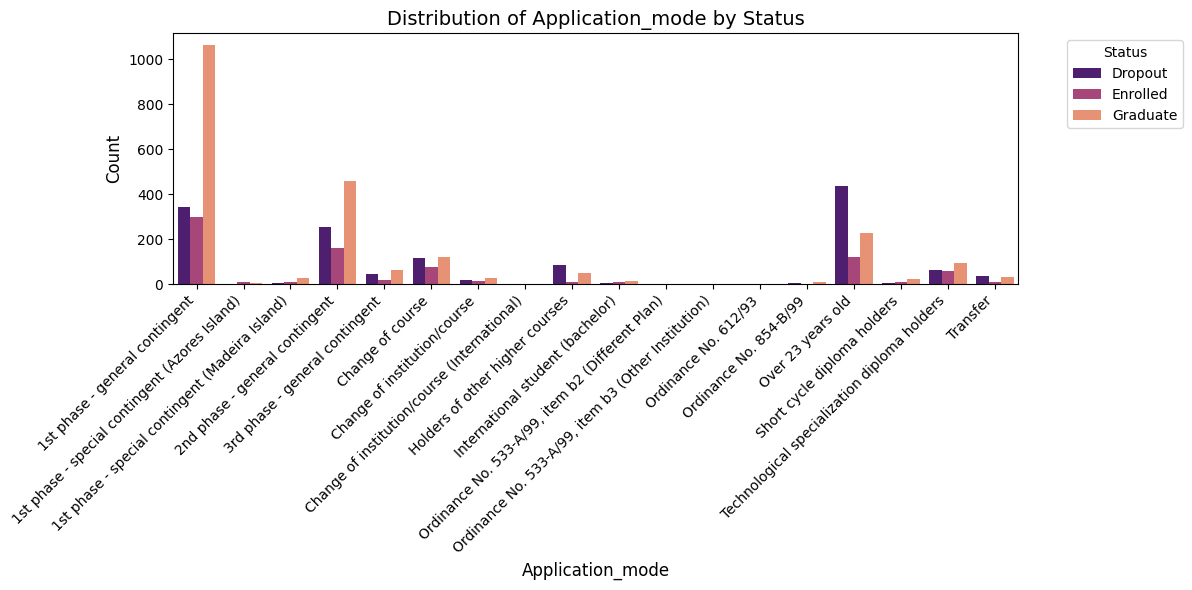

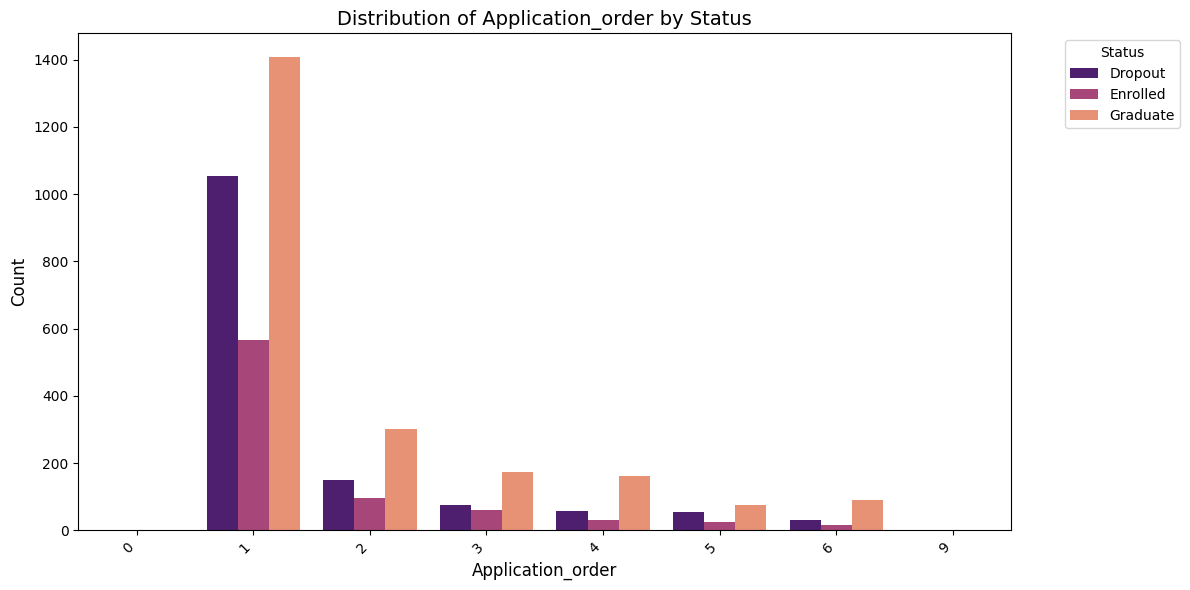

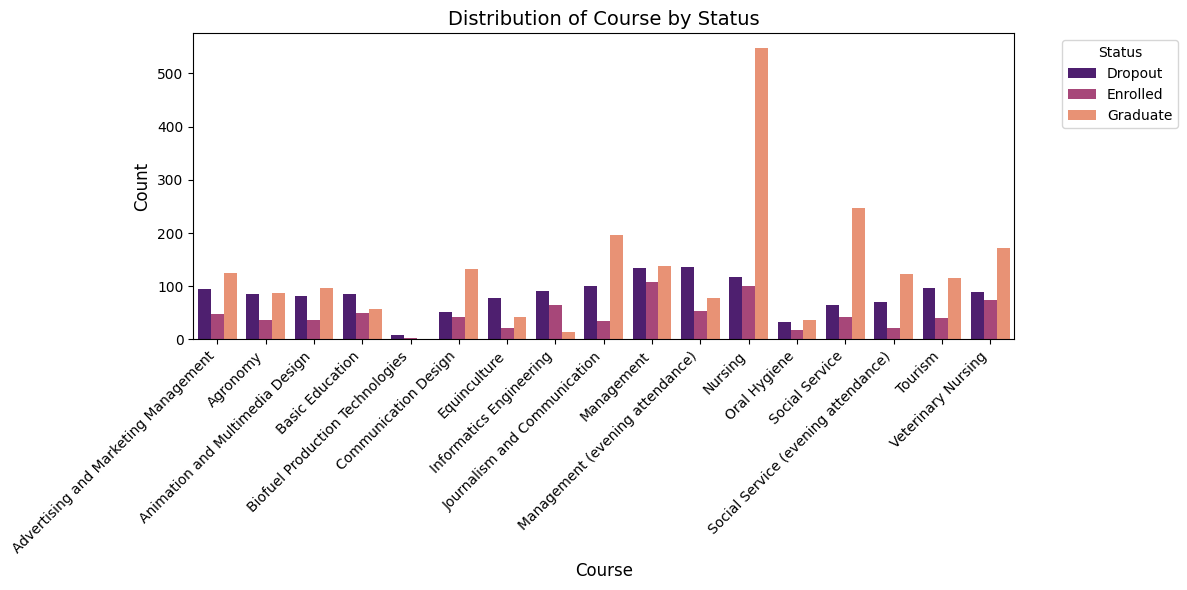

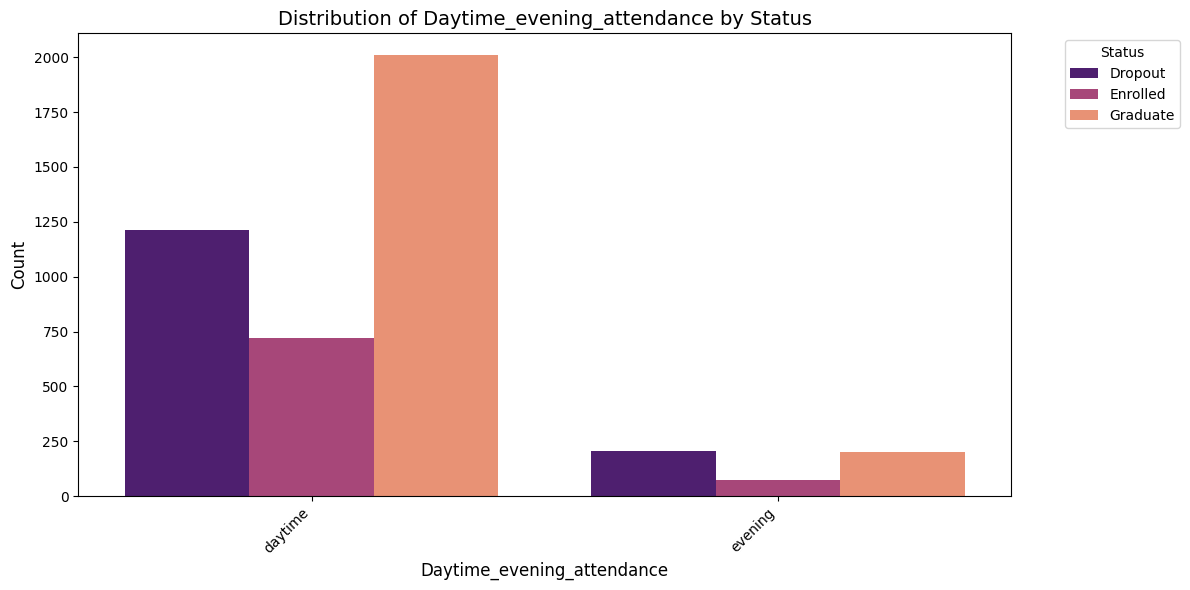

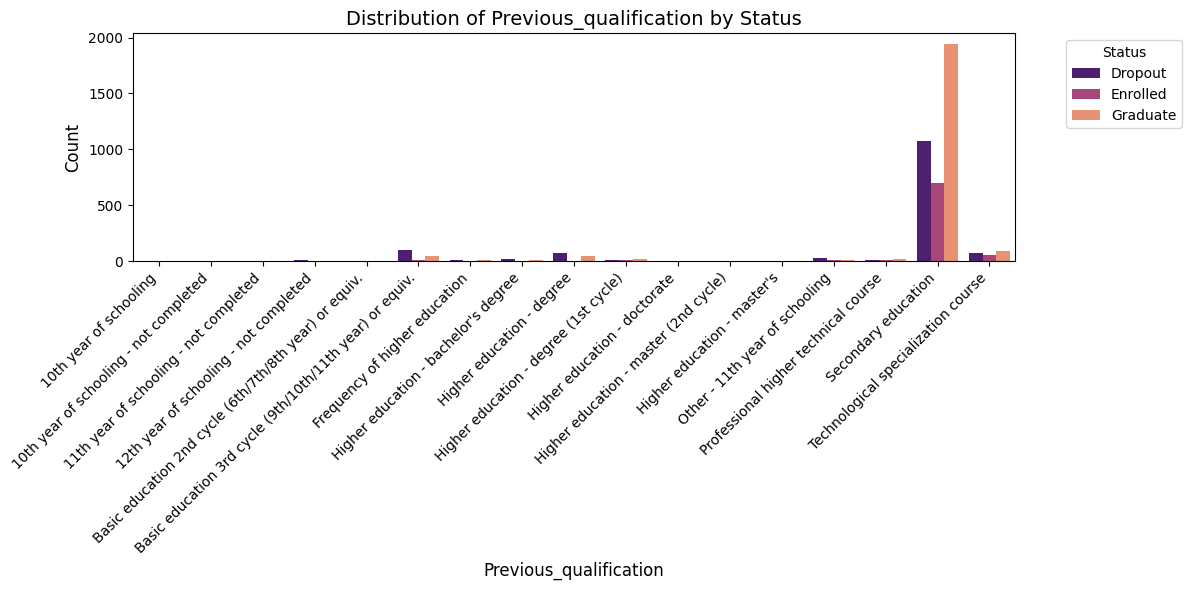

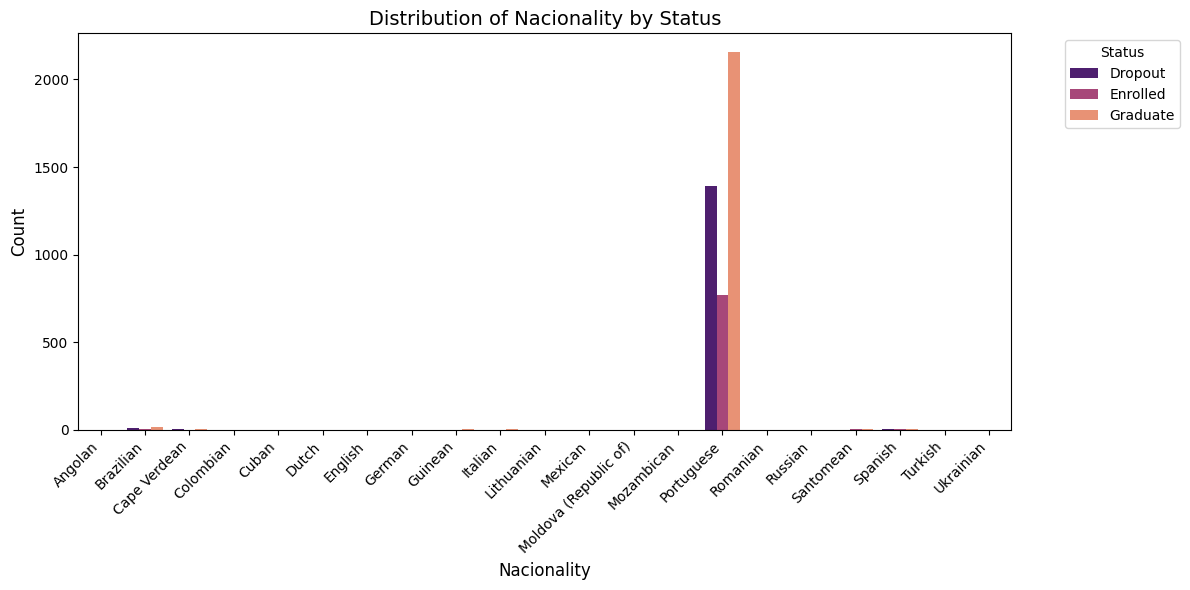

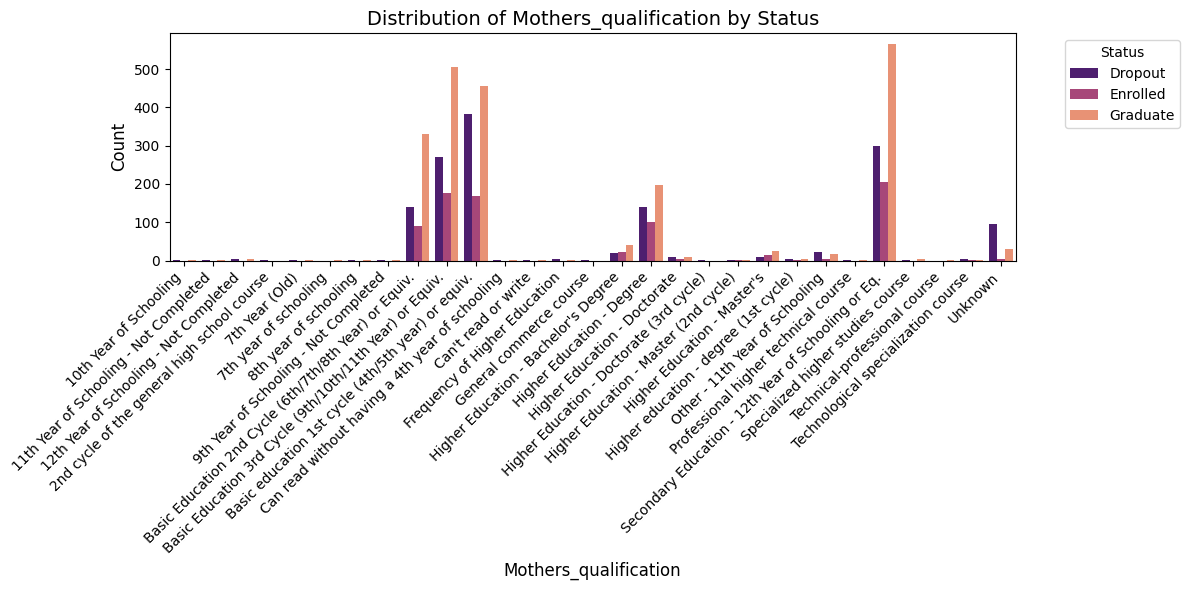

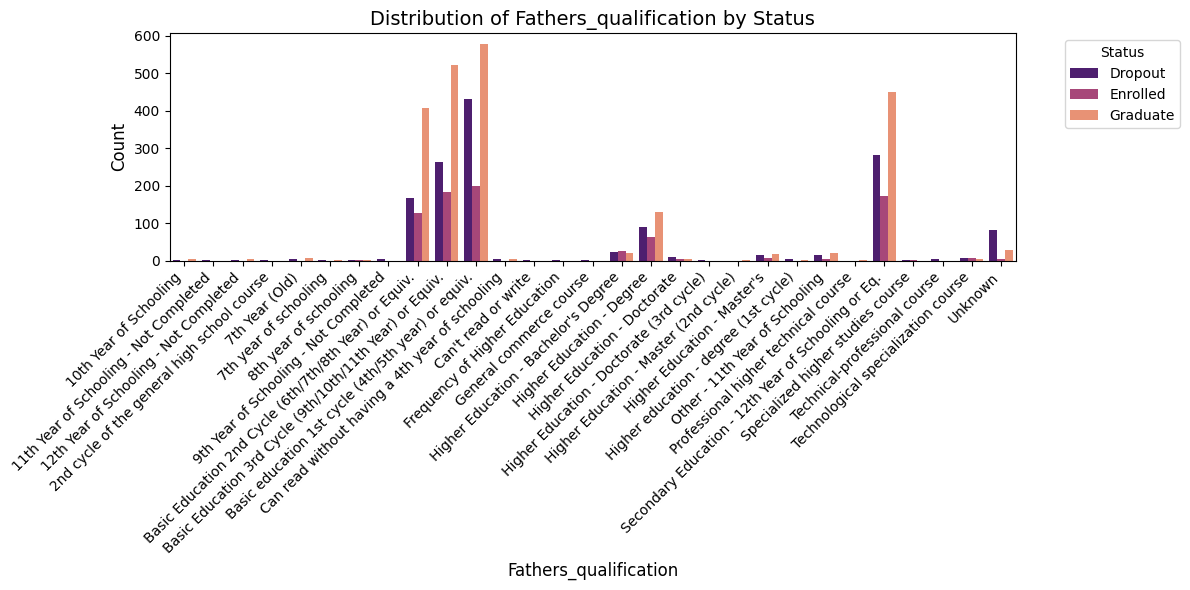

/tmp/ipython-input-26-960331500.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


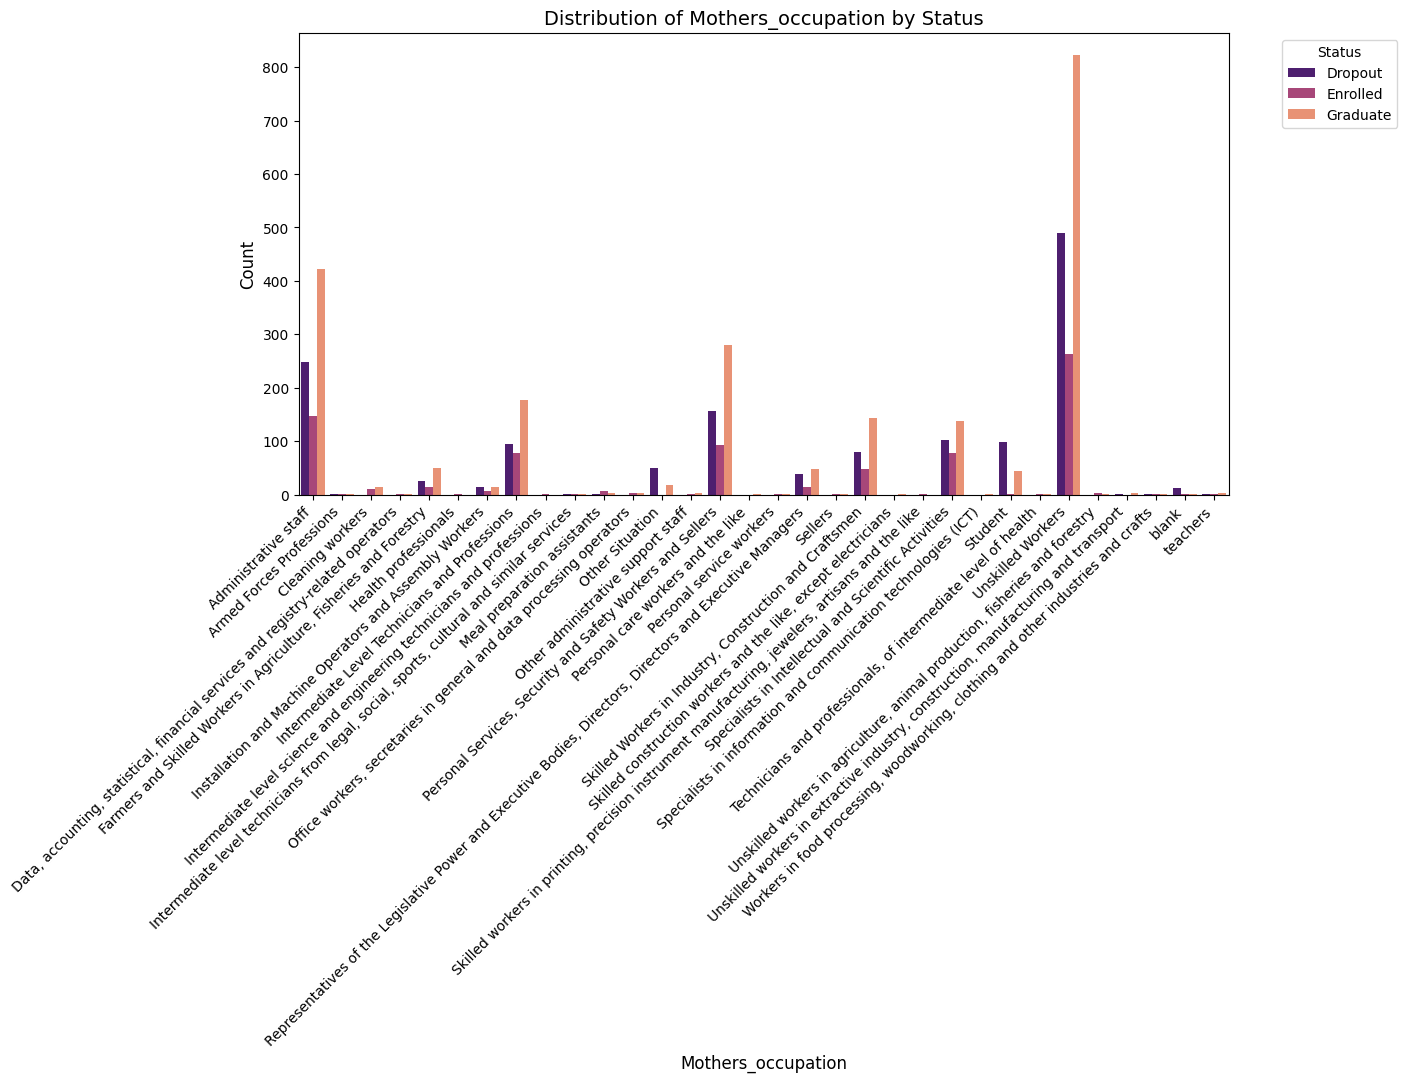

/tmp/ipython-input-26-960331500.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


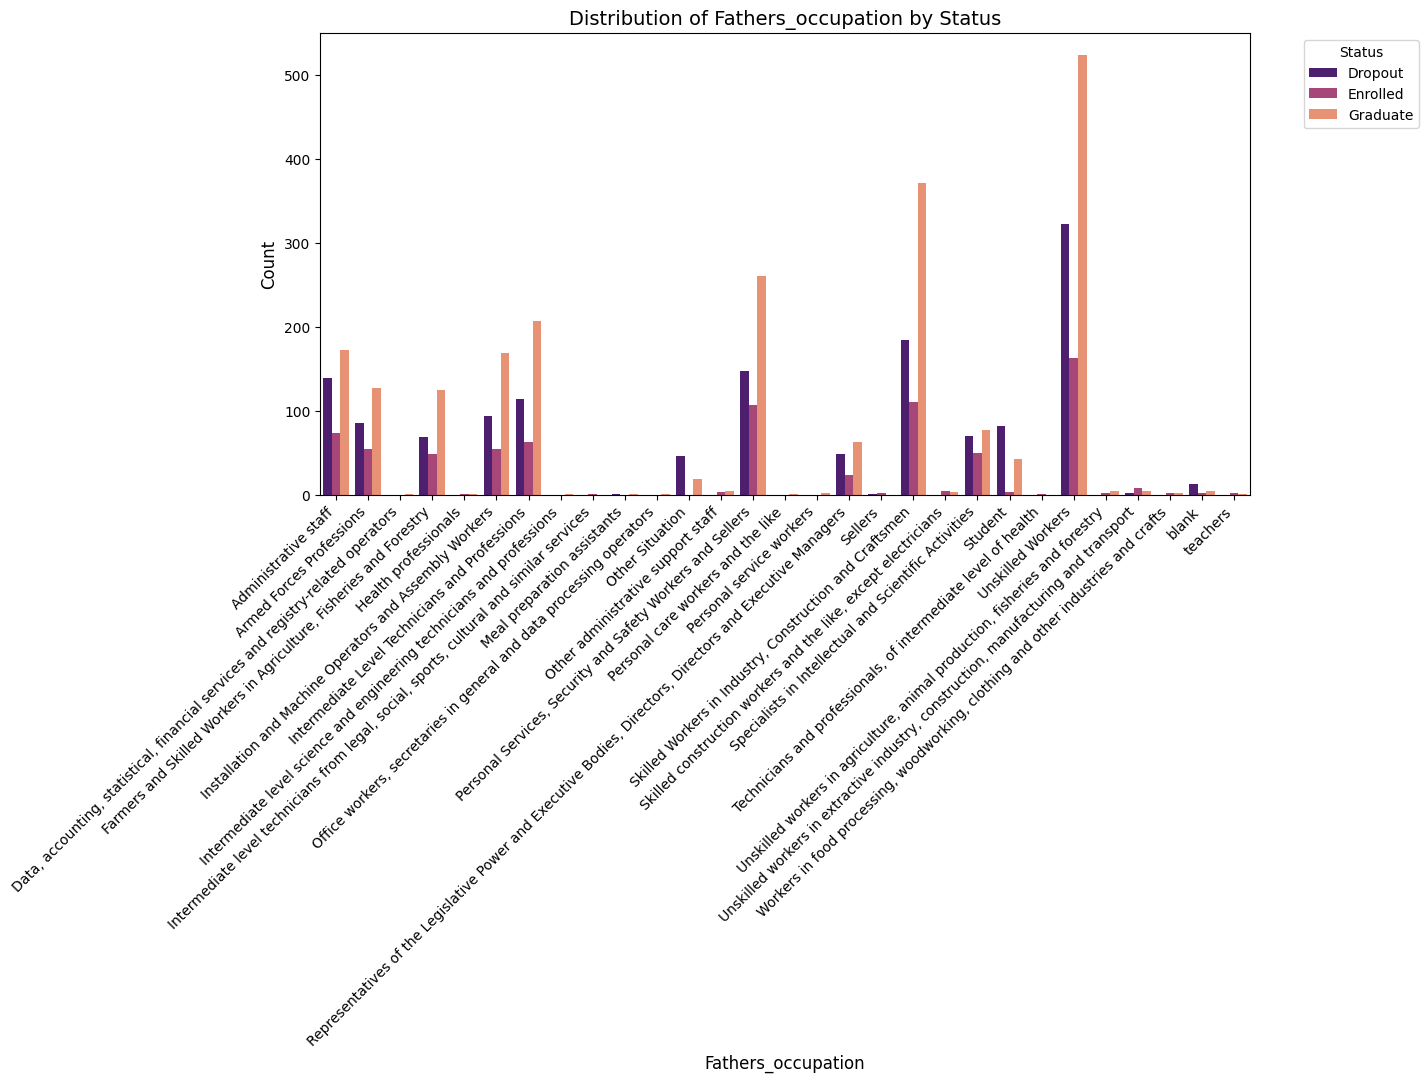

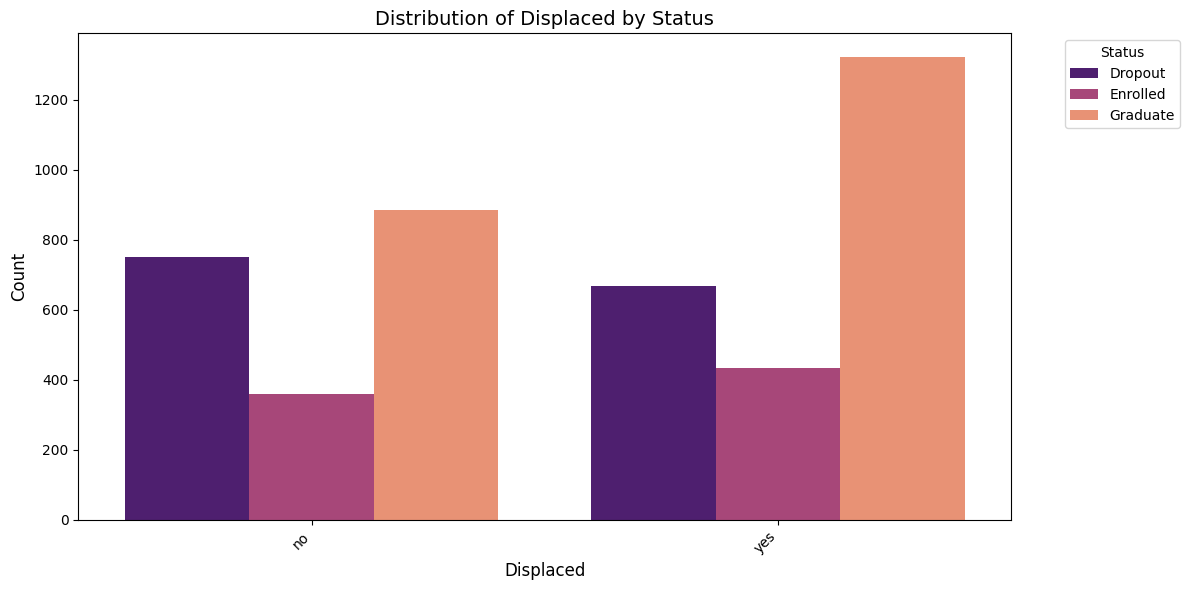

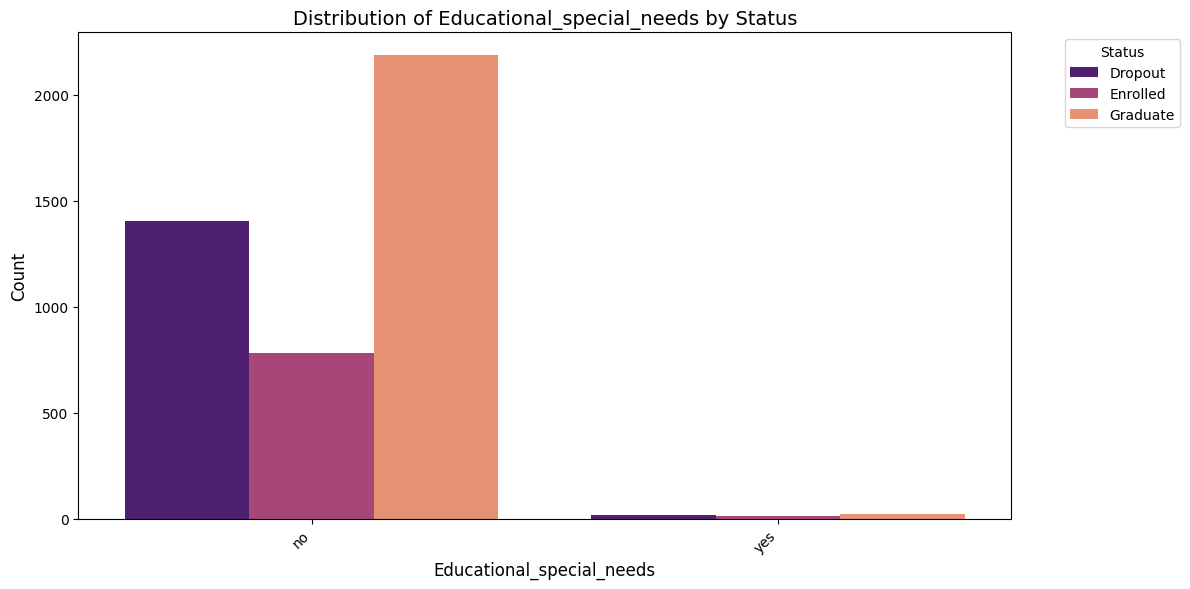

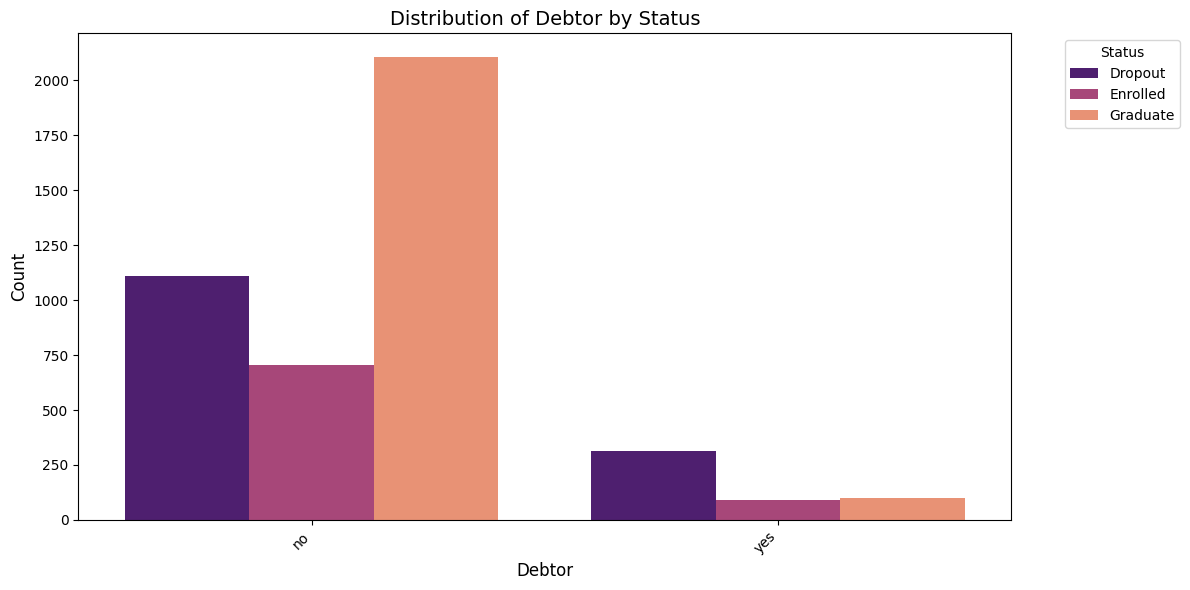

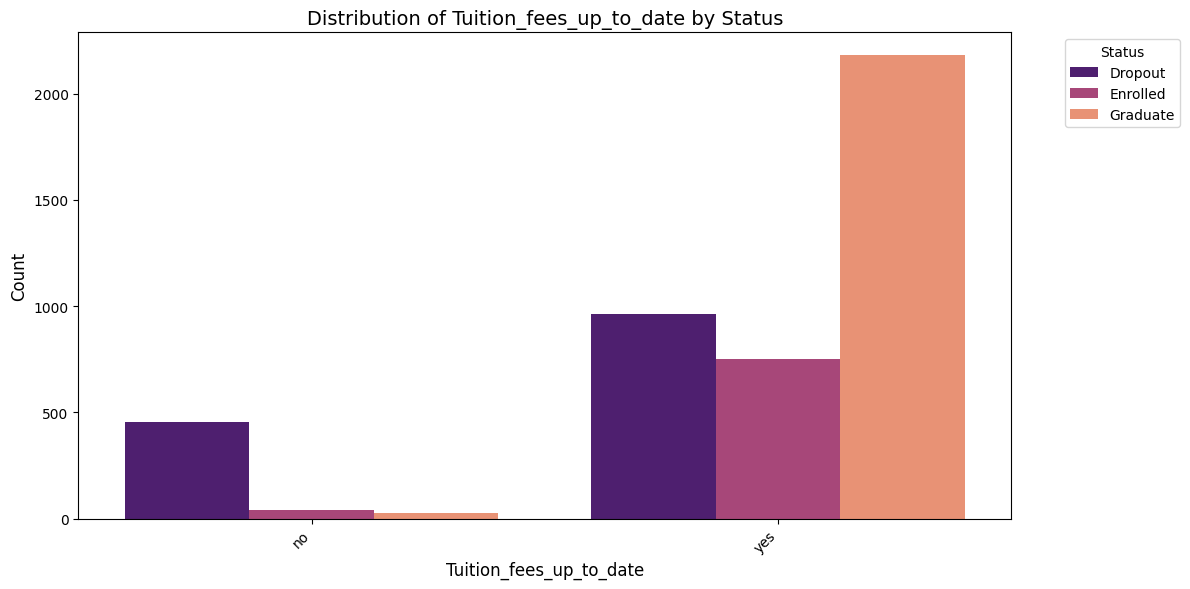

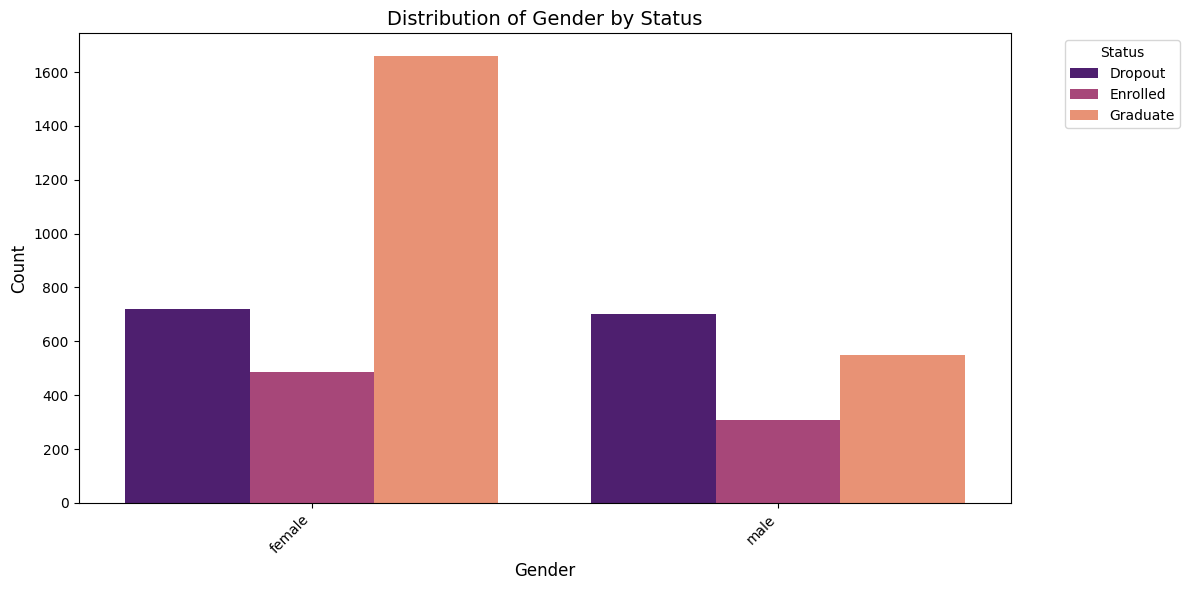

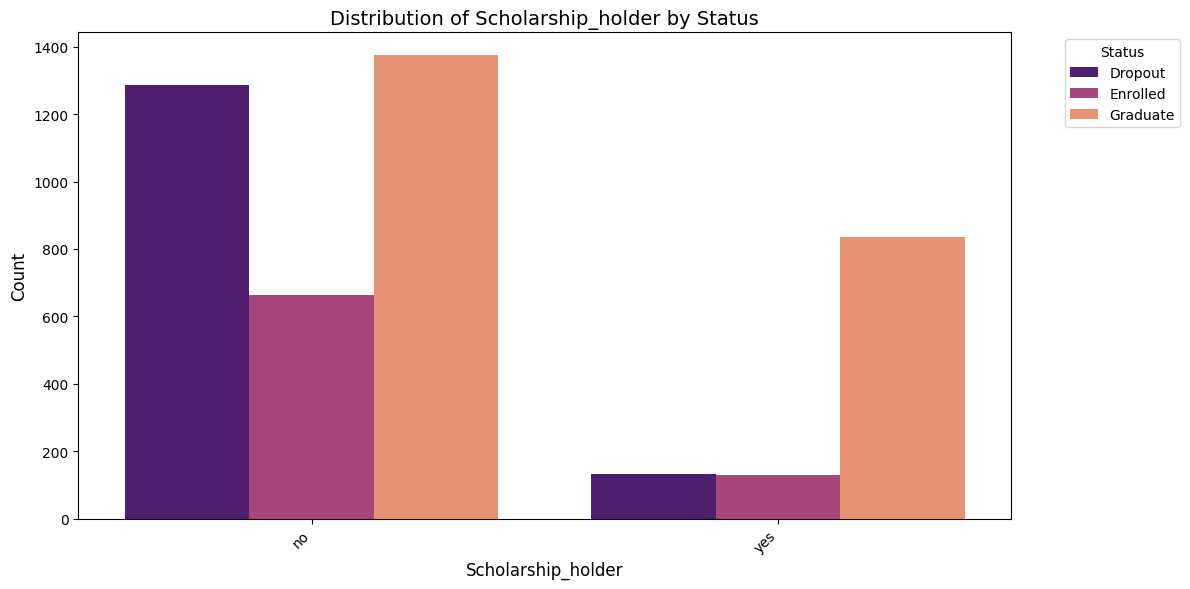

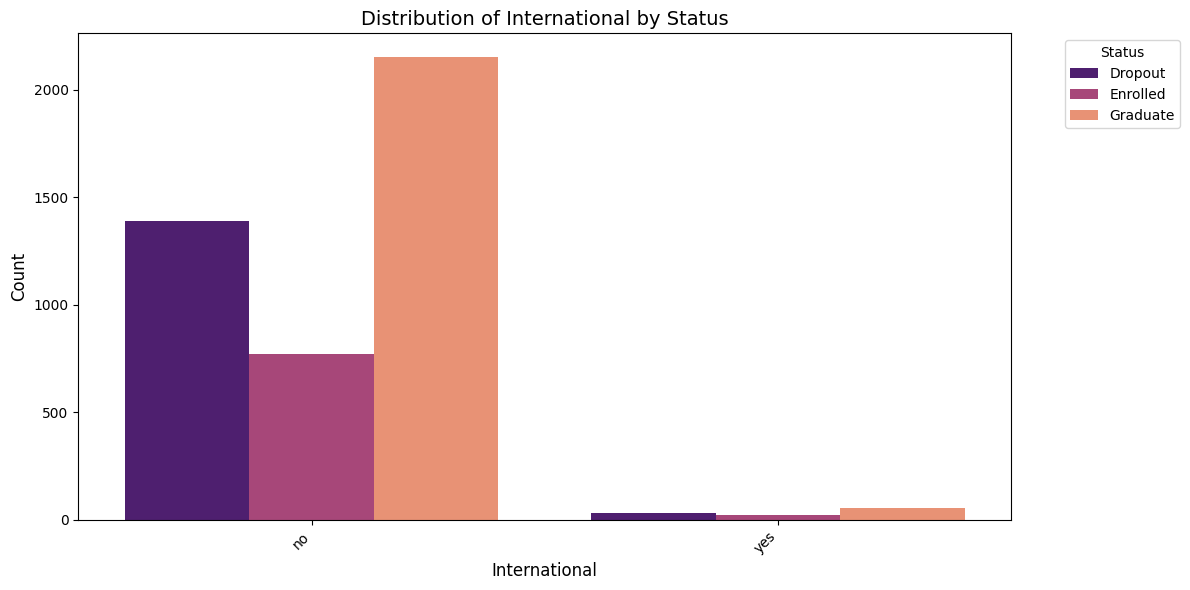

In [26]:
for col in category_cols:
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(data=df_students, x=col, hue='Status', palette='magma')

    plt.title(f'Distribution of {col} by Status', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Status', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    plt.show()



*   Marital_status : Mahasiswa dengan status 'single' memiliki jumlah dropout yang signifikan dibandingkan dengan status lainnya. Status pernikahan tampaknya berkorelasi dengan tingkat dropout.
*   Application_mode : Mode aplikasi '1st phase - general contingent' dan 'International student (bachelor)' memiliki jumlah lulusan (Graduate) yang tinggi, tetapi mode '2nd phase - general contingent' juga memiliki jumlah dropout yang cukup banyak.
*   Application_order : Mahasiswa yang mendaftar pada 'Application_order' 1 memiliki jumlah lulusan terbanyak, tetapi juga jumlah dropout yang paling tinggi. Ini mungkin karena mayoritas data berasal dari order aplikasi pertama.
*   Course : Beberapa jurusan seperti 'Nursing' dan 'Management' memiliki jumlah lulusan yang lebih tinggi dibandingkan dengan dropout. Sebaliknya, jurusan seperti 'Communication Design' dan 'Journalism and Communication' memiliki proporsi dropout yang relatif tinggi.
*   Daytime_evening_attendance : Mahasiswa yang mengambil kelas 'daytime' memiliki jumlah lulusan dan dropout yang jauh lebih banyak dibandingkan dengan kelas 'evening'. Hal ini wajar mengingat jumlah mahasiswa daytime lebih banyak.
*   Previous_qualification : Mahasiswa dengan kualifikasi 'Secondary education' memiliki jumlah lulusan dan dropout terbanyak, yang konsisten dengan mayoritas populasi.
*   Nacionality : Mahasiswa 'Portuguese' mendominasi data dan memiliki jumlah lulusan dan dropout terbanyak. Mahasiswa dari negara lain memiliki jumlah yang lebih kecil, tetapi proporsi dropout bisa bervariasi.
*   Mothers_qualification dan Fathers_qualification : Kualifikasi pendidikan orang tua tampaknya memiliki pengaruh terhadap status mahasiswa. Pola distribusi status mahasiswa bervariasi tergantung pada tingkat pendidikan ibu dan ayah.
*   Mothers_occupation dan Fathers_occupation : Pekerjaan orang tua juga menunjukkan pola distribusi status mahasiswa yang berbeda. Beberapa kategori pekerjaan orang tua mungkin lebih berkorelasi dengan status lulus atau dropout.
*   Displaced : Mahasiswa yang 'displaced' (yes) memiliki jumlah lulusan dan dropout yang lebih banyak dibandingkan yang 'no'.
*   Educational_special_needs : Mayoritas mahasiswa tidak memiliki kebutuhan pendidikan khusus. Jumlah dropout pada kelompok ini lebih tinggi, tetapi ini karena ukuran sampel yang lebih besar.
*   Debtor : Mahasiswa yang merupakan 'debtor' (yes) memiliki proporsi dropout yang lebih tinggi dibandingkan yang 'no'. Ini menunjukkan korelasi antara status pembayaran biaya kuliah dan kemungkinan dropout.
*   Tuition_fees_up_to_date : Mahasiswa yang membayar biaya kuliah tepat waktu ('yes') memiliki jumlah lulusan yang jauh lebih tinggi dan jumlah dropout yang lebih rendah dibandingkan yang tidak tepat waktu ('no'). Ini adalah indikator kuat terkait dengan status mahasiswa.
*   Gender : Mahasiswa 'female' memiliki jumlah lulusan dan dropout yang lebih banyak dibandingkan 'male', sejalan dengan jumlah total mahasiswa female yang lebih banyak. Proporsi dropout antara gender tampaknya tidak jauh berbeda.
*   Scholarship_holder : Mahasiswa yang tidak menerima beasiswa ('no') memiliki jumlah dropout yang jauh lebih tinggi dibandingkan yang menerima beasiswa ('yes'). Ini menunjukkan bahwa beasiswa dapat menjadi faktor penting dalam membantu mahasiswa tetap kuliah hingga lulus.
*   International : Mahasiswa 'Portuguese' memiliki jumlah lulusan dan dropout yang lebih banyak. Mahasiswa internasional memiliki jumlah yang lebih kecil, tetapi proporsi status mereka bervariasi.







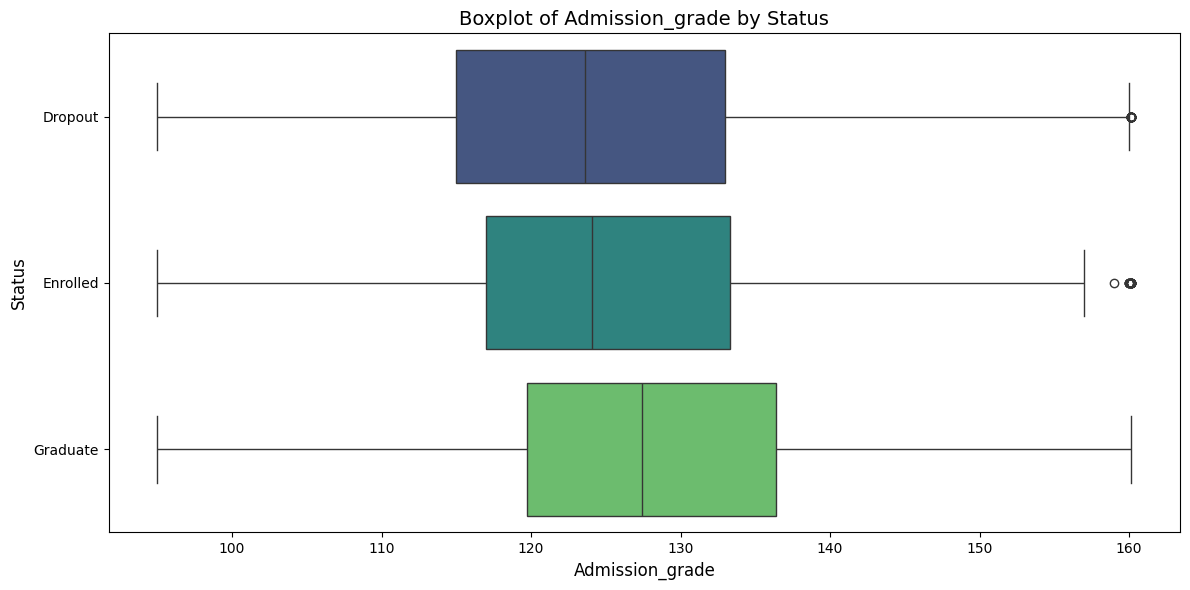

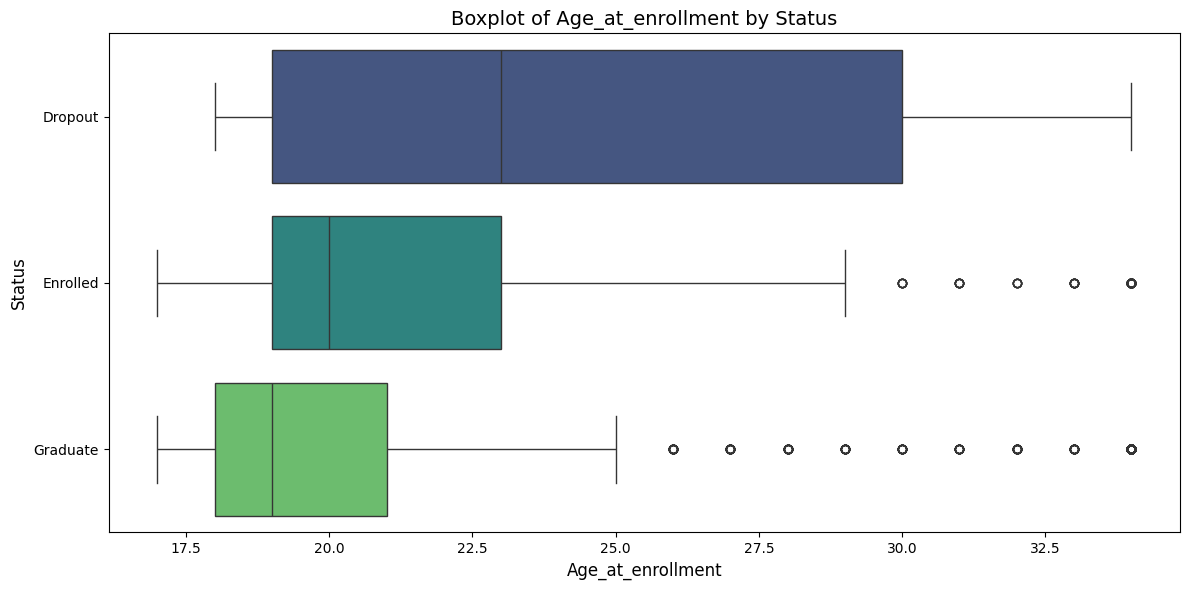

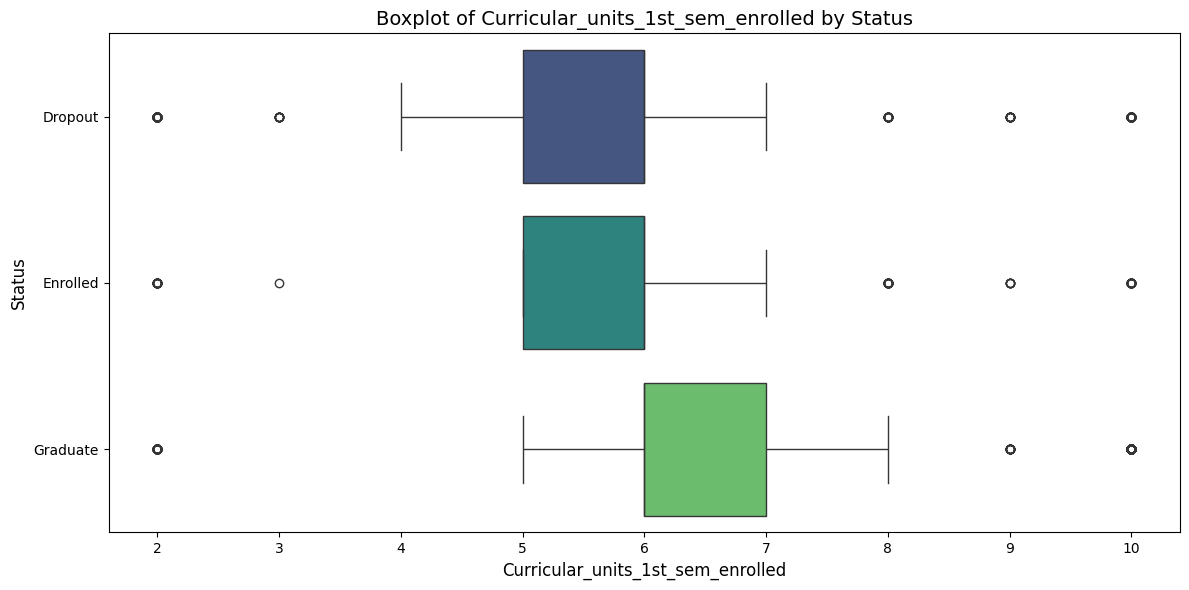

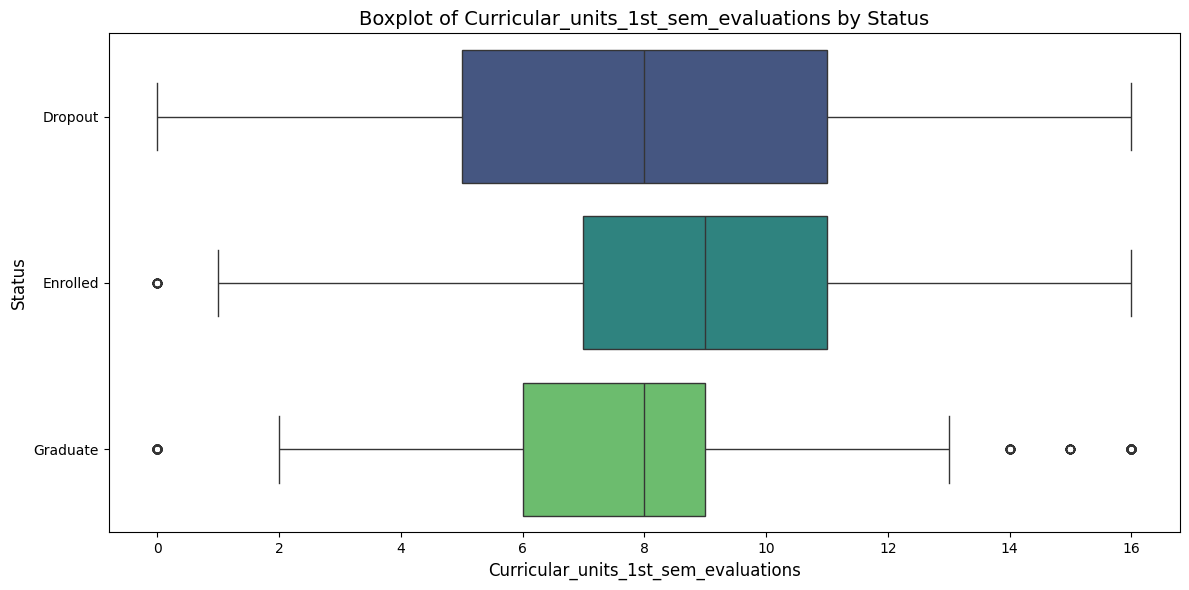

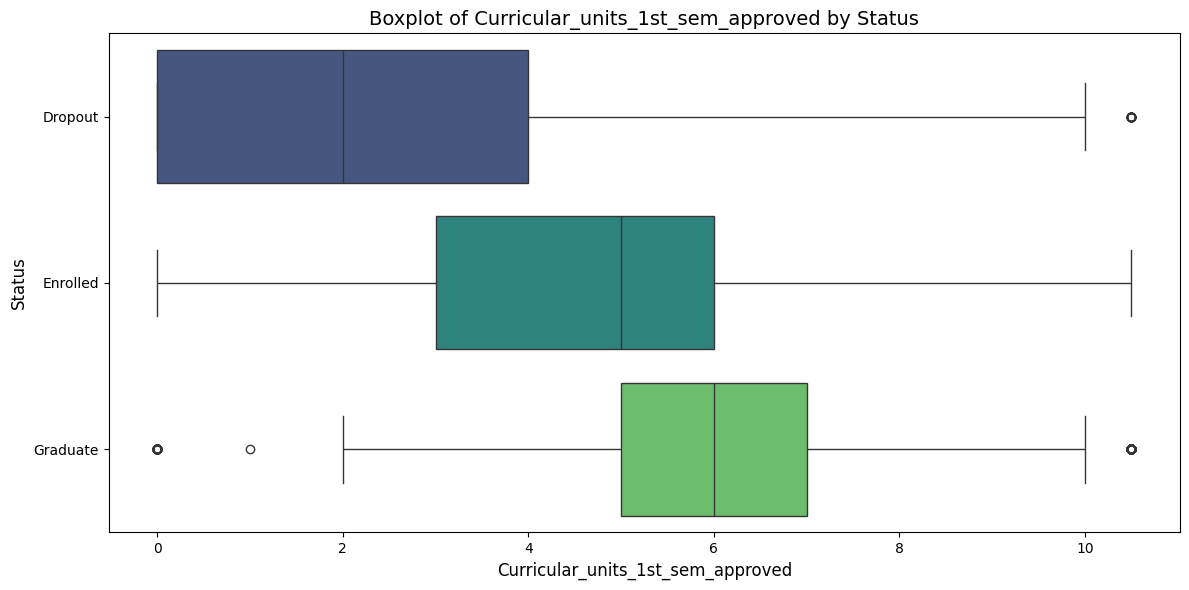

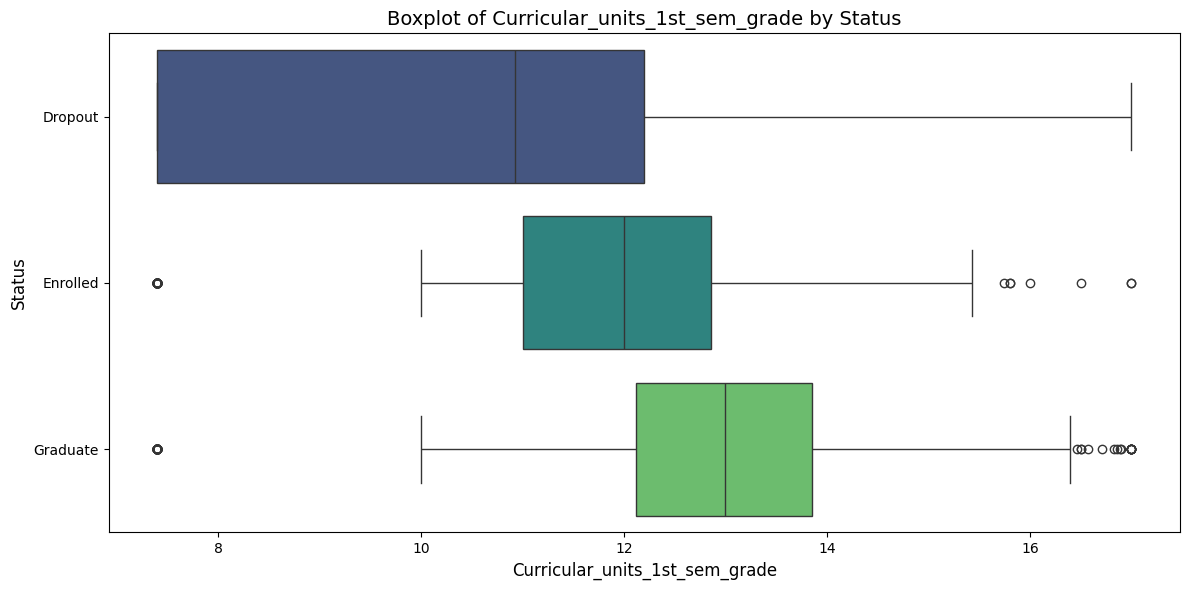

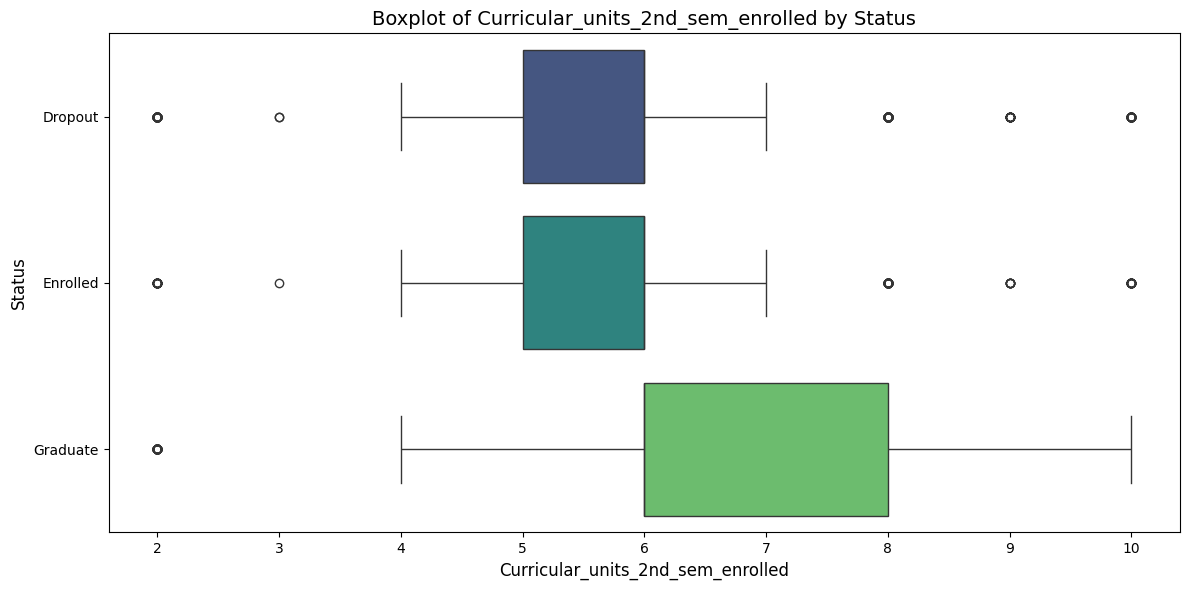

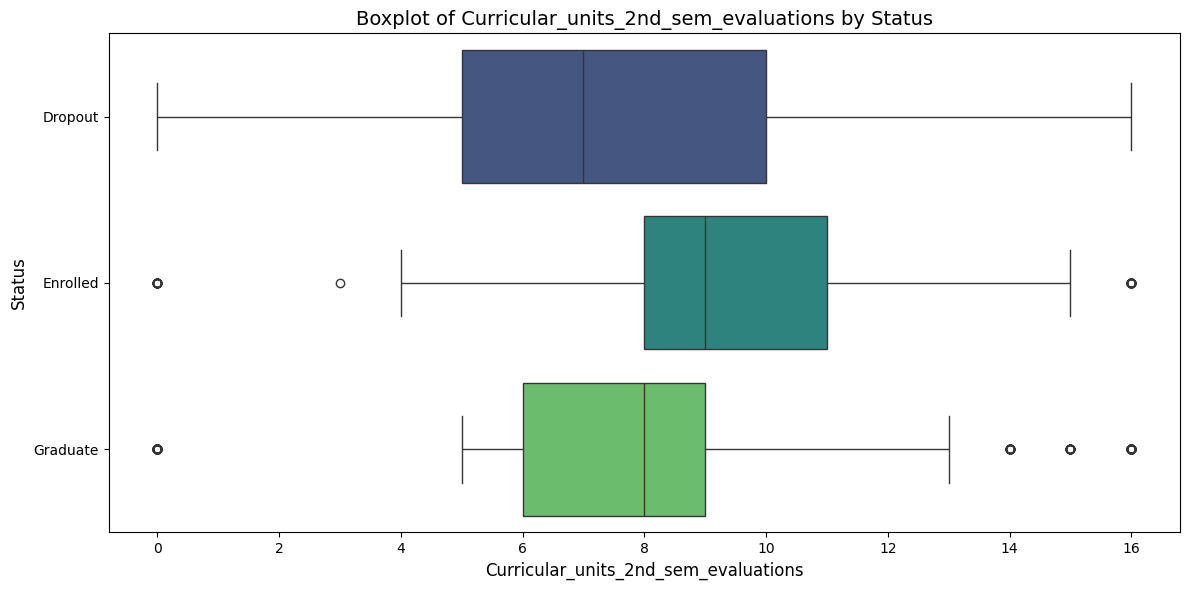

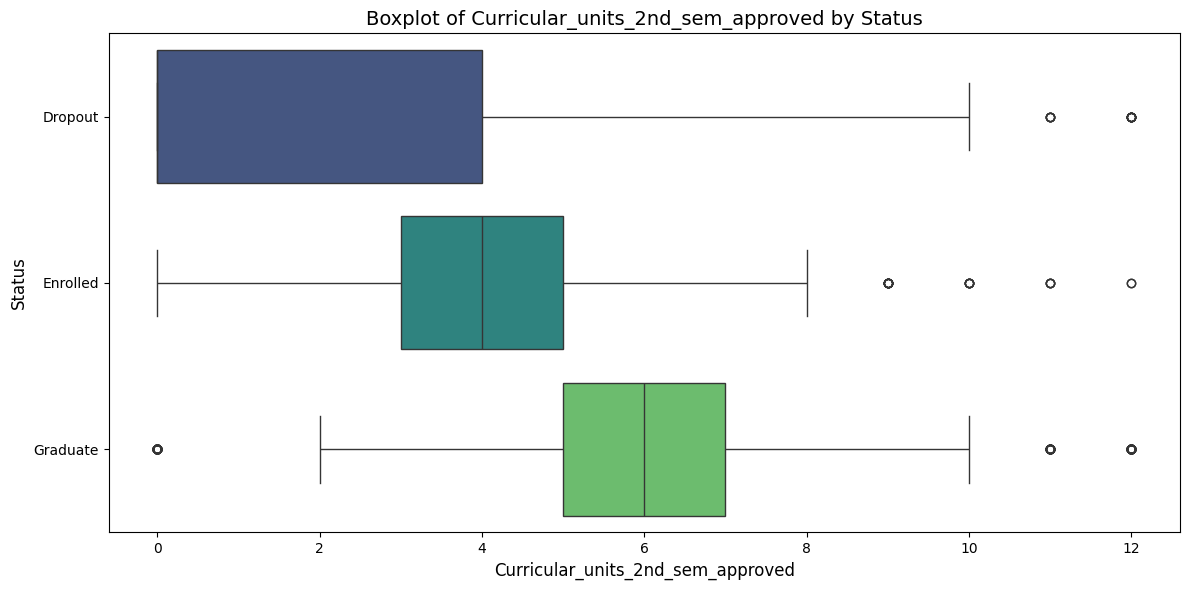

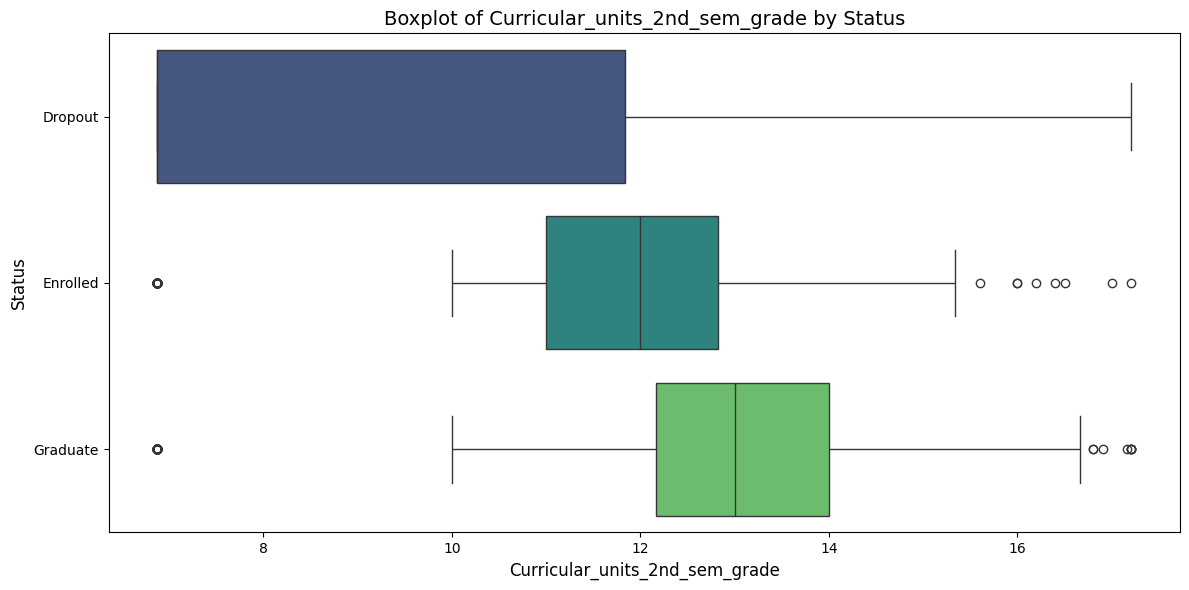

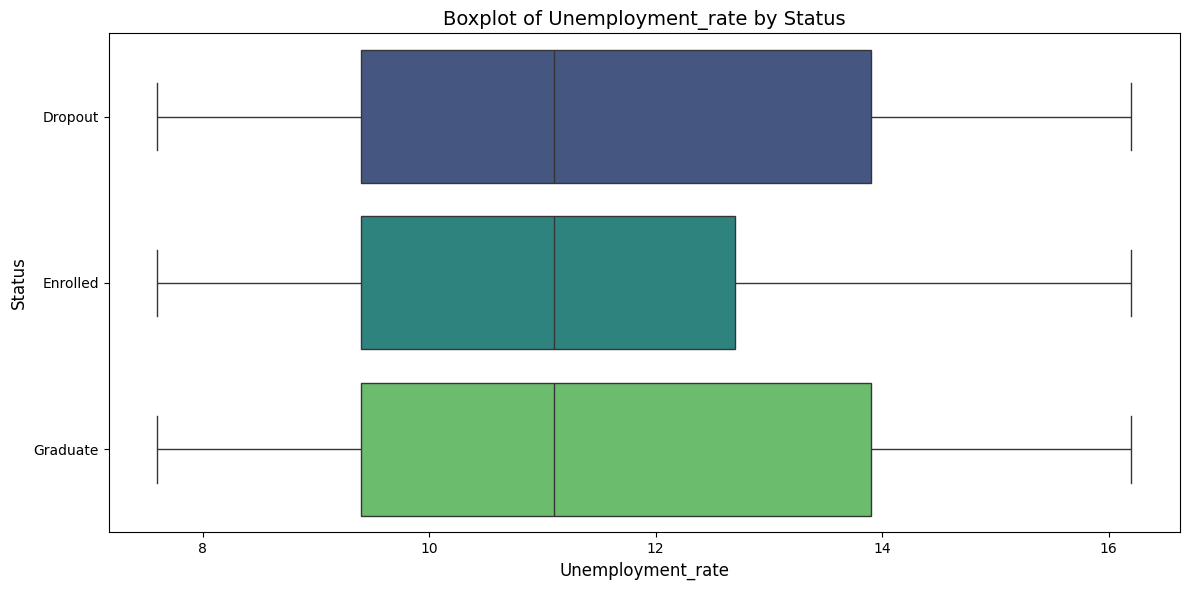

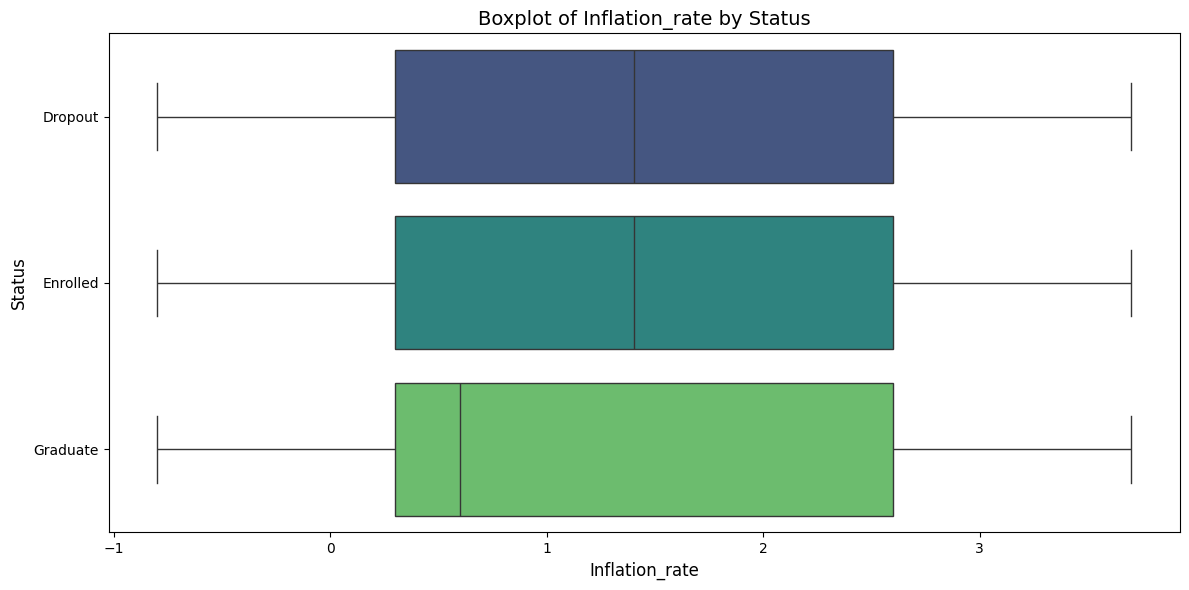

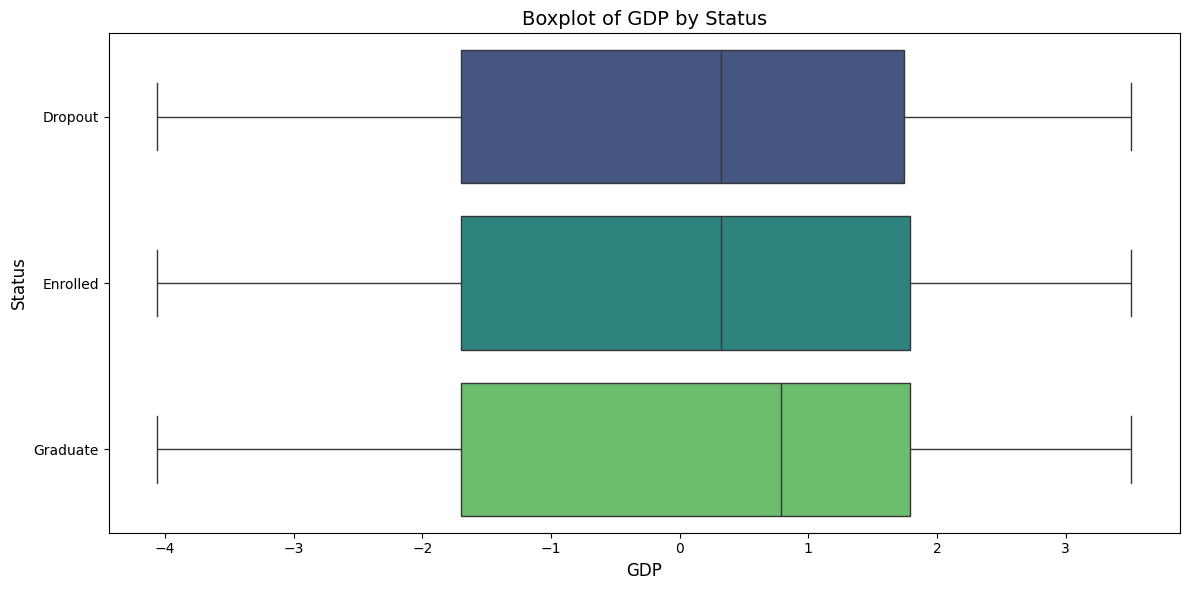

In [27]:
numerical_cols = ['Admission_grade', 'Age_at_enrollment',
                  'Curricular_units_1st_sem_enrolled',
                  'Curricular_units_1st_sem_evaluations',
                  'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
                  'Curricular_units_2nd_sem_enrolled',
                  'Curricular_units_2nd_sem_evaluations',
                  'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
                  'Unemployment_rate', 'Inflation_rate', 'GDP']

for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_students, y='Status', x=col, hue='Status', palette='viridis', legend=False)
    plt.title(f'Boxplot of {col} by Status', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Status', fontsize=12)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()

**Menghitung Jumlah Masing-Masing Kategori dalam Kolom Status**

In [28]:
jumlah_status = df_students['Status'].value_counts()
print(jumlah_status)

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


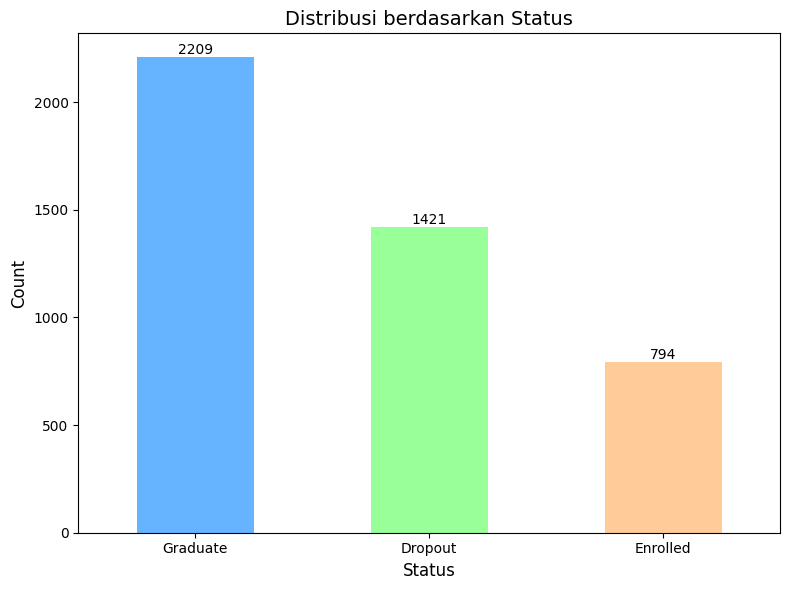

In [29]:
plt.figure(figsize=(8, 6))
ax = jumlah_status.plot(kind='bar', color=['#66b3ff', '#99ff99', '#ffcc99'])


for container in ax.containers:
    ax.bar_label(container)


plt.title('Distribusi berdasarkan Status', fontsize=14)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

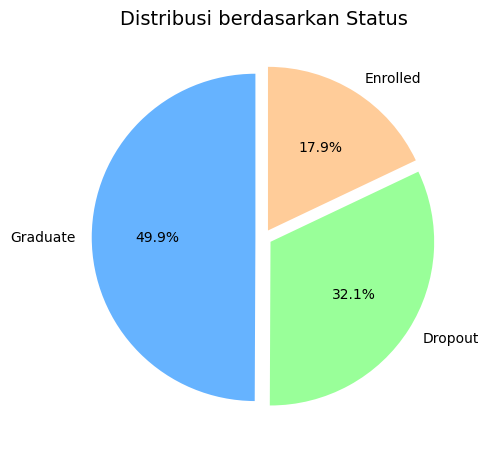

In [30]:
plt.figure(figsize=(5, 5))
jumlah_status.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#99ff99', '#ffcc99'],
    explode=[0.05] * len(jumlah_status),
    labels=jumlah_status.index
)

plt.title('Distribusi berdasarkan Status', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

**Menghapus spasi atau karakter tersembunyi pada nilai Status**

In [31]:
df_students['Status'] = df_students['Status'].str.strip()

**Menghapus baris dengan Status = 'Enrolled'**

In [32]:
df_students = df_students[df_students['Status'] != 'Enrolled']

**Mengecek Missing Value**

In [33]:
df_students.isnull().sum()

Marital_status                           0
Application_mode                         0
Application_order                        0
Course                                   0
Daytime_evening_attendance               0
Previous_qualification                   0
Previous_qualification_grade             0
Nacionality                              0
Mothers_qualification                    0
Fathers_qualification                    5
Mothers_occupation                       0
Fathers_occupation                      20
Admission_grade                          0
Displaced                                0
Educational_special_needs                0
Debtor                                   0
Tuition_fees_up_to_date                  0
Gender                                   0
Scholarship_holder                       0
Age_at_enrollment                        0
International                            0
Curricular_units_1st_sem_enrolled        0
Curricular_units_1st_sem_evaluations     0
Curricular_units_1st_sem_approved        0
Curricular_units_1st_sem_grade           0
Curricular_units_2nd_sem_enrolled        0
Curricular_units_2nd_sem_evaluations     0
Curricular_units_2nd_sem_approved        0
Curricular_units_2nd_sem_grade           0
Unemployment_rate                        0
Inflation_rate                           0
GDP                                      0
Status                                   0
dtype: int64

Terdapat missing value pada kolom Fathers_qualification dan Fathers_occupation.

**Mengatasi Missing Value**

In [34]:
df_students[df_students['Fathers_qualification'].isnull()]

Marital_status                 Application_mode Application_order  \
926          single  Holders of other higher courses                 1   
1388         single   2nd phase - general contingent                 6   
3666        married                         Transfer                 1   
3847         single   2nd phase - general contingent                 1   
4328        married                 Change of course                 2   

                            Course Daytime_evening_attendance  \
926             Veterinary Nursing                    daytime   
1388       Informatics Engineering                    daytime   
3666          Communication Design                    daytime   
3847  Journalism and Communication                    daytime   
4328               Basic Education                    daytime   

         Previous_qualification Previous_qualification_grade Nacionality  \
926   Higher education - degree                        140.0  Portuguese   
1388        Secondary education                        129.0  Portuguese   
3666        Secondary education                        170.0  Portuguese   
3847        Secondary education                        127.0  Portuguese   
4328        Secondary education                        130.0  Portuguese   

                                  Mothers_qualification Fathers_qualification  \
926   Basic Education 3rd Cycle (9th/10th/11th Year)...                   NaN   
1388  Basic education 1st cycle (4th/5th year) or eq...                   NaN   
3666  Basic education 1st cycle (4th/5th year) or eq...                   NaN   
3847  Secondary Education - 12th Year of Schooling o...                   NaN   
4328  Basic Education 2nd Cycle (6th/7th/8th Year) o...                   NaN   

      ... Curricular_units_1st_sem_approved Curricular_units_1st_sem_grade  \
926   ...                               1.0                      14.000000   
1388  ...                               0.0                       7.400000   
3666  ...                               8.0                      14.625000   
3847  ...                               0.0                       7.400000   
4328  ...                               6.0                      13.666667   

      Curricular_units_2nd_sem_enrolled Curricular_units_2nd_sem_evaluations  \
926                                   5                                   12   
1388                                  5                                    5   
3666                                  7                                    7   
3847                                  5                                   10   
4328                                  6                                    8   

     Curricular_units_2nd_sem_approved Curricular_units_2nd_sem_grade  \
926                                  0                          6.875   
1388                                 0                          6.875   
3666                                 5                         13.400   
3847                                 0                          6.875   
4328                                 5                         13.500   

     Unemployment_rate Inflation_rate   GDP   Status  
926               10.8            1.4  1.74  Dropout  
1388               7.6            2.6  0.32  Dropout  
3666               9.4           -0.8 -3.12  Dropout  
3847              10.8            1.4  1.74  Dropout  
4328               9.4           -0.8 -3.12  Dropout  

[5 rows x 33 columns]

In [35]:
df_students = df_students[df_students['Status'] != 'Enrolled'].copy()
df_students.dropna(inplace=True)

In [36]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3605 entries, 0 to 4423
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Marital_status                        3605 non-null   category
 1   Application_mode                      3605 non-null   category
 2   Application_order                     3605 non-null   category
 3   Course                                3605 non-null   category
 4   Daytime_evening_attendance            3605 non-null   category
 5   Previous_qualification                3605 non-null   category
 6   Previous_qualification_grade          3605 non-null   category
 7   Nacionality                           3605 non-null   category
 8   Mothers_qualification                 3605 non-null   category
 9   Fathers_qualification                 3605 non-null   category
 10  Mothers_occupation                    3605 non-null   category
 11  Fathers_o

**Encoding Data Kategorikal**

In [37]:
columns_category = df_students.select_dtypes(include=['category', 'object']).columns

encoders = {}

for column in columns_category:
    encoder = LabelEncoder()
    df_students[column] = encoder.fit_transform(df_students[column])
    encoders[column] = encoder

In [38]:
joblib_path = "encoder.joblib"
joblib.dump(encoders, joblib_path)

['encoder.joblib']

In [39]:
df_students.head()

Marital_status  Application_mode  Application_order  Course  \
0               4                 3                  5       2   
1               4                 9                  1      15   
2               4                 0                  5       5   
3               4                 3                  2       8   
4               3                14                  1      14   

   Daytime_evening_attendance  Previous_qualification  \
0                           0                      15   
1                           0                      15   
2                           0                      15   
3                           0                      15   
4                           1                      15   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                            28           13                      9   
1                            78           13                     24   
2                            28           13                     10   
3                            28           13                      8   
4                             4           13                     10   

   Fathers_qualification  ...  Curricular_units_1st_sem_approved  \
0                     22  ...                                0.0   
1                     16  ...                                6.0   
2                     10  ...                                0.0   
3                     10  ...                                6.0   
4                      8  ...                                5.0   

   Curricular_units_1st_sem_grade  Curricular_units_2nd_sem_enrolled  \
0                        7.400000                                  2   
1                       14.000000                                  6   
2                        7.400000                                  6   
3                       13.428571                                  6   
4                       12.333333                                  6   

   Curricular_units_2nd_sem_evaluations  Curricular_units_2nd_sem_approved  \
0                                     0                                  0   
1                                     6                                  6   
2                                     0                                  0   
3                                    10                                  5   
4                                     6                                  6   

   Curricular_units_2nd_sem_grade  Unemployment_rate  Inflation_rate   GDP  \
0                        6.875000               10.8             1.4  1.74   
1                       13.666667               13.9            -0.3  0.79   
2                        6.875000               10.8             1.4  1.74   
3                       12.400000                9.4            -0.8 -3.12   
4                       13.000000               13.9            -0.3  0.79   

   Status  
0       0  
1       1  
2       0  
3       1  
4       1  

[5 rows x 33 columns]

In [40]:
df_students.to_csv('student_encoded.csv', index=False)

In [41]:
df_students.Marital_status.value_counts()

Marital_status
4    3177
3     324
0      75
1      22
2       5
5       2
Name: count, dtype: int64

## Modelling

In [42]:
X = df_students.drop(columns=['Status'])
y = df_students['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
y_train.value_counts()

Status
1    1753
0    1131
Name: count, dtype: int64

In [44]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [45]:
y_resampled.value_counts()

Status
1    1753
0    1753
Name: count, dtype: int64

In [46]:
X_resampled.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Unemployment_rate', 'Inflation_rate', 'GDP'],
      dtype='object')

In [47]:
X_resampled

Marital_status  Application_mode  Application_order  Course  \
0                  4                 3                  1      14   
1                  4                 0                  2       2   
2                  4                 3                  2      14   
3                  4                 0                  4      11   
4                  4                16                  1       1   
...              ...               ...                ...     ...   
3501               4                 1                  2      12   
3502               3                 5                  1       5   
3503               4                 8                  1      13   
3504               1                 9                  1       6   
3505               4                 4                  1      12   

      Daytime_evening_attendance  Previous_qualification  \
0                              1                      15   
1                              0                      15   
2                              1                      15   
3                              0                      15   
4                              0                      16   
...                          ...                     ...   
3501                           0                      15   
3502                           0                      15   
3503                           0                       8   
3504                           0                       9   
3505                           0                      15   

      Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                               26           13                      8   
1                               38           13                     10   
2                               43           13                      9   
3                               57           13                     24   
4                               54           13                      9   
...                            ...          ...                    ...   
3501                            17           14                      8   
3502                            39           13                      9   
3503                            54           13                     16   
3504                            54           13                     10   
3505                            33           13                      9   

      Fathers_qualification  ...  Curricular_units_1st_sem_evaluations  \
0                        10  ...                                    11   
1                        10  ...                                     0   
2                        24  ...                                     6   
3                        16  ...                                     8   
4                         8  ...                                     7   
...                     ...  ...                                   ...   
3501                     18  ...                                    12   
3502                      9  ...                                    12   
3503                     16  ...                                     9   
3504                     10  ...                                     5   
3505                      8  ...                                    12   

      Curricular_units_1st_sem_approved  Curricular_units_1st_sem_grade  \
0                              4.000000                       12.000000   
1                              0.000000                        7.400000   
2                              6.000000                       11.666667   
3                              7.000000                       14.565714   
4                              6.000000                       12.857143   
...                                 ...                             ...   
3501                           2.290756                       11.505882   
3502                           8.276566                       11.640951   
350

In [48]:
numerical_cols = ['Previous_qualification_grade',
                  'Admission_grade', 'Age_at_enrollment',
                  'Curricular_units_1st_sem_enrolled',
                  'Curricular_units_1st_sem_evaluations',
                  'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
                  'Curricular_units_2nd_sem_enrolled',
                  'Curricular_units_2nd_sem_evaluations',
                  'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
                  'Unemployment_rate', 'Inflation_rate', 'GDP']

category_cols = [
    'Marital_status', 'Application_mode', 'Application_order', 'Course',
    'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality', 'Mothers_qualification',
    'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
    'Displaced', 'Educational_special_needs', 'Debtor',
    'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International'
]

**Membuat transformer untuk Numerik**

In [49]:
transformer_numeric = Pipeline(steps=[
    ('scaler', StandardScaler())
])

**Membuat transformer untuk Kategori**

In [50]:
transformer_categorical = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

**Menggabungkan Transformer dengan ColumnTransformer**

In [51]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, numerical_cols),
        ('cat', transformer_categorical, category_cols)
    ]
)

**Membuat Pipeline untuk Model Random Forest**

In [52]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

**Melatih Model dengan Data Oversampling**

In [53]:
pipeline.fit(X_resampled, y_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Previous_qualification_grade',
                                                   'Admission_grade',
                                                   'Age_at_enrollment',
                                                   'Curricular_units_1st_sem_enrolled',
                                                   'Curricular_units_1st_sem_evaluations',
                                                   'Curricular_units_1st_sem_approved',
                                                   'Curricular_units_1st_sem_grade',
                                                   'Curricular_units_2...
                                                   'Application_order',
                                                   'Course',
                                                   'Daytime_evening_attendance',
                                                   'Previous_qualification',
                                                   'Nacionality',
                                                   'Mothers_qualification',
                                                   'Fathers_qualification',
                                                   'Mothers_occupation',
                                                   'Fathers_occupation',
                                                   'Displaced',
                                                   'Educational_special_needs',
                                                   'Debtor',
                                                   'Tuition_fees_up_to_date',
                                                   'Gender',
                                                   'Scholarship_holder',
                                                   'International'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

**Memprediksi Pada Data Uji**

In [54]:
y_pred = pipeline.predict(X_test)

## Evaluation

In [55]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       283
           1       0.88      0.95      0.91       438

    accuracy                           0.89       721
   macro avg       0.89      0.88      0.88       721
weighted avg       0.89      0.89      0.89       721



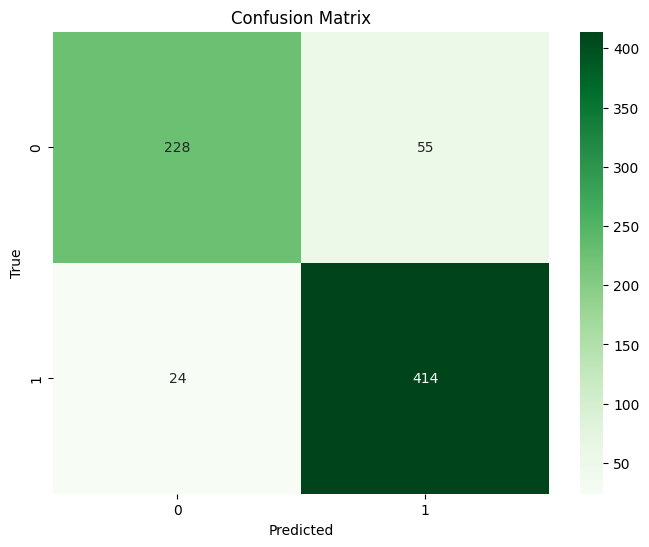

In [56]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [57]:
!pip freeze > requirements.txt